In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout
from fbprophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading dataset
dataset = pd.read_csv('/content/drive/MyDrive/PROJECT+LAB/covid_19_data.csv')

# **Analysis of Dataset**

In [4]:
#Displaying number of rows
dataset.shape

(172480, 8)

In [5]:
#Displaying datatypes of attributes
dataset.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [6]:
#check for null attributes
dataset.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     47883
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [7]:
#Deleting SNo column
dataset.drop(["SNo"],1,inplace=True)

# Displaying Dataset after ignoring unwanted attributes


In [8]:
#Display first ten rows of daatset
dataset.head(10)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [9]:
#Displaying last ten rows of dataset
dataset.tail(10)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
172470,12/06/2020,Yukon,Canada,2020-12-07 05:26:14,54.0,1.0,41.0
172471,12/06/2020,Yunnan,Mainland China,2020-12-07 05:26:14,221.0,2.0,210.0
172472,12/06/2020,Zabaykalsky Krai,Russia,2020-12-07 05:26:14,20823.0,339.0,18955.0
172473,12/06/2020,Zacatecas,Mexico,2020-12-07 05:26:14,18098.0,1430.0,0.0
172474,12/06/2020,Zakarpattia Oblast,Ukraine,2020-12-07 05:26:14,24541.0,554.0,15299.0
172475,12/06/2020,Zaporizhia Oblast,Ukraine,2020-12-07 05:26:14,36539.0,337.0,6556.0
172476,12/06/2020,Zeeland,Netherlands,2020-12-07 05:26:14,6710.0,104.0,0.0
172477,12/06/2020,Zhejiang,Mainland China,2020-12-07 05:26:14,1295.0,1.0,1288.0
172478,12/06/2020,Zhytomyr Oblast,Ukraine,2020-12-07 05:26:14,31967.0,531.0,22263.0
172479,12/06/2020,Zuid-Holland,Netherlands,2020-12-07 05:26:14,154813.0,2414.0,0.0


In [10]:
#Formatting date to datetime formaat
dataset['ObservationDate'] = pd.to_datetime(dataset['ObservationDate'])
dataset['Last Update'] = pd.to_datetime(dataset['Last Update'])

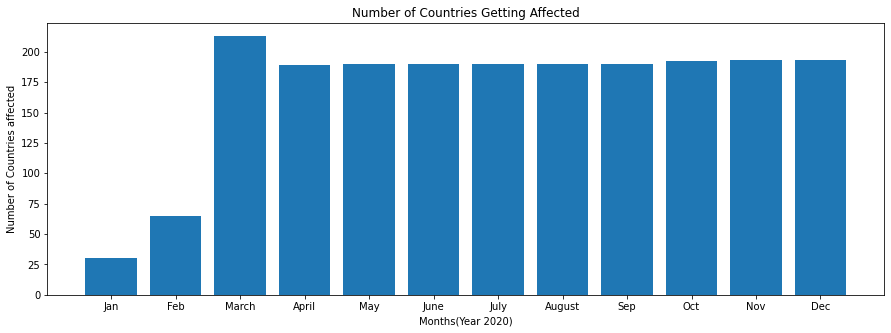

In [11]:
#Visualizing affected countries monthwise from Jan 2020 to Dec 2020
months = ['Jan','Feb','March','April','May','June','July','August','Sep','Oct','Nov','Dec']
countries_affected = []
for x in range(1,13):
    countries_affected.append(dataset[dataset['ObservationDate'].dt.month == x]['Country/Region'].nunique())
plt.figure(figsize = (15,5))    
plt.bar(months,countries_affected)    
plt.xlabel('Months(Year 2020)')
plt.ylabel("Number of Countries affected")
plt.title('Number of Countries Getting Affected')
plt.show()

In [12]:
#Visualizing Top ten countries month wise
first_month = dataset[dataset['ObservationDate'] == '01/31/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)

In [13]:
second_month = dataset[dataset['ObservationDate'] == '02/29/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)

In [14]:
third_month = dataset[dataset['ObservationDate'] == '03/31/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)

In [15]:
fourth_month= dataset[dataset['ObservationDate'] == '04/30/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)

In [16]:
fifth_month= dataset[dataset['ObservationDate'] == '05/31/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)


In [17]:
sixth_month= dataset[dataset['ObservationDate'] == '06/30/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)

In [18]:
seventh_month= dataset[dataset['ObservationDate'] == '07/31/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)

In [19]:
eighth_month= dataset[dataset['ObservationDate'] == '08/31/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)

In [20]:
nineth_month= dataset[dataset['ObservationDate'] == '09/30/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)

In [21]:
tenth_month= dataset[dataset['ObservationDate'] == '10/31/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)

In [22]:
eleventh_month= dataset[dataset['ObservationDate'] == '11/30/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)

In [23]:
twelth_month= dataset[dataset['ObservationDate'] == '12/06/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)

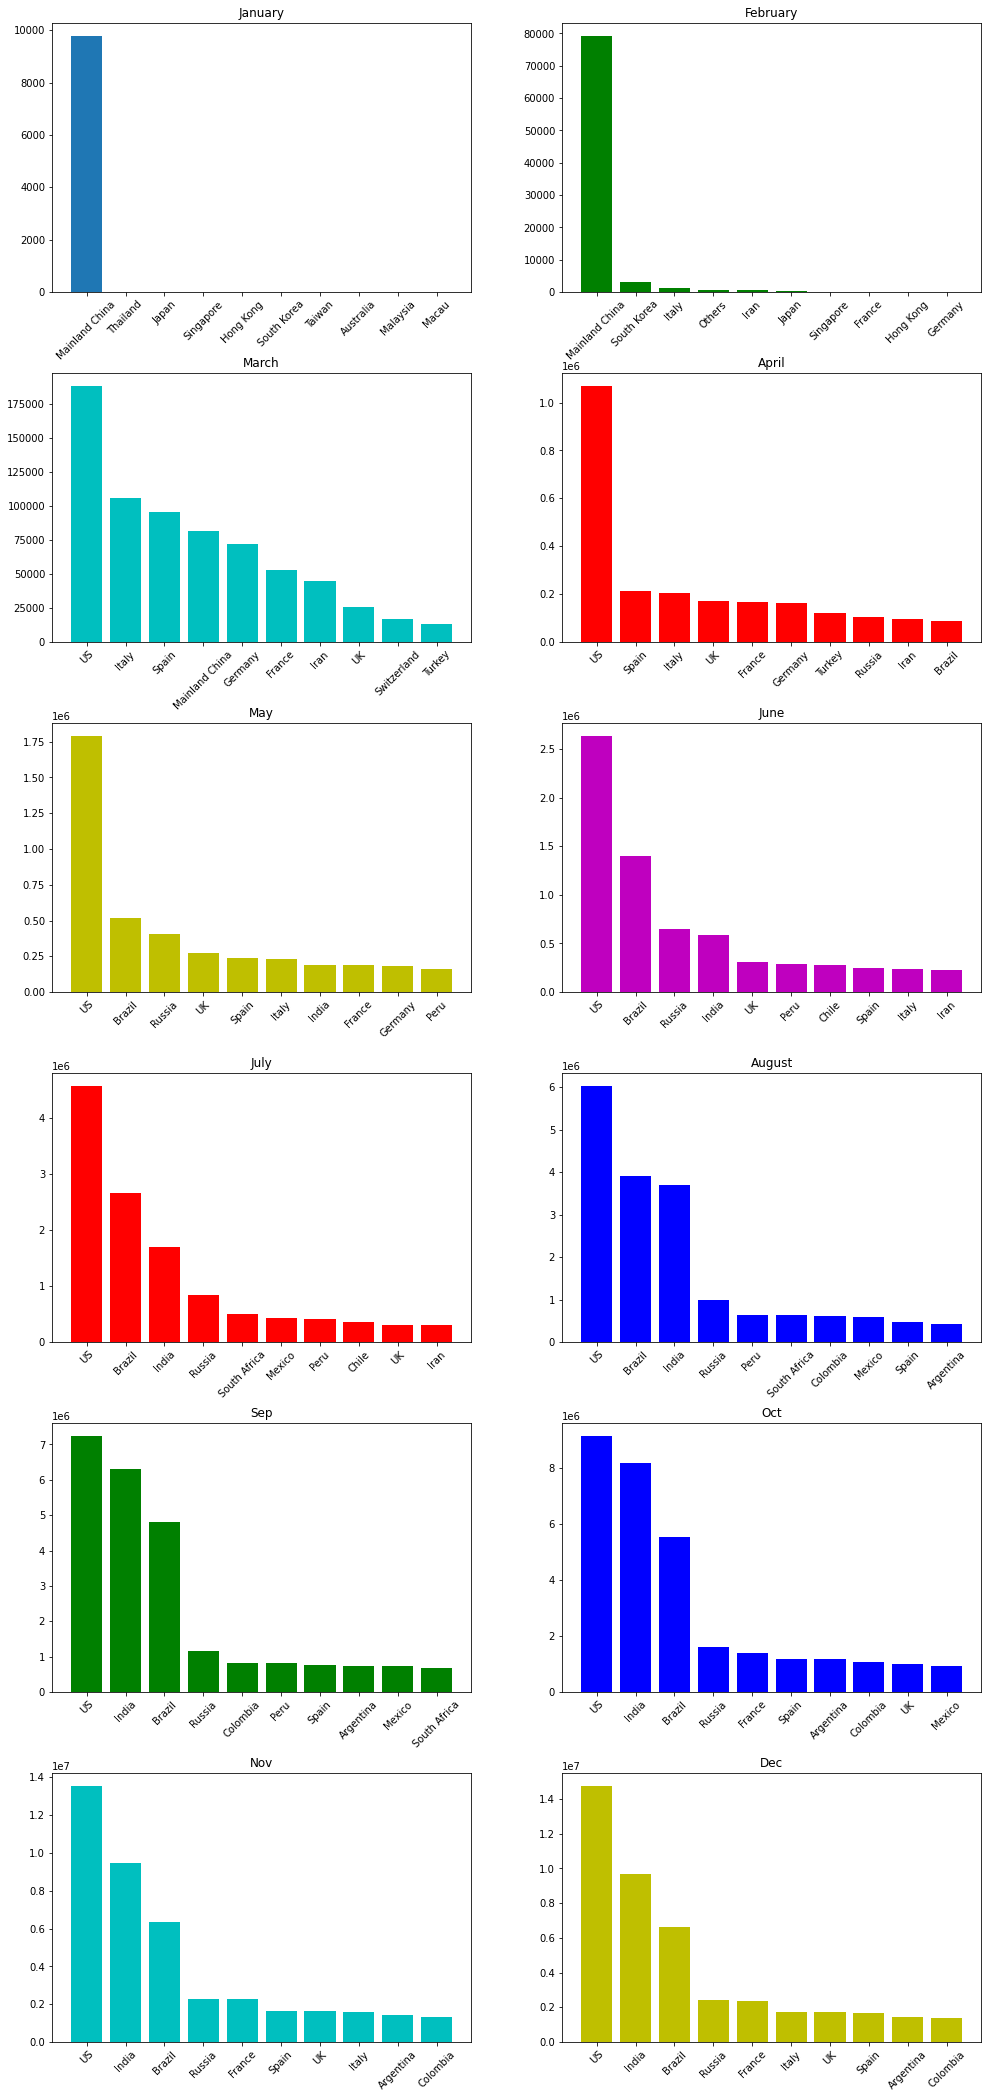

In [24]:
fig, ax = plt.subplots(nrows = 6, ncols = 2, figsize = (15,30))
fig.tight_layout(pad=6.0)

ax[0,0].bar(first_month.index.tolist(),first_month.tolist())
ax[0,0].set_xticklabels(first_month.index.tolist(),rotation = 45, minor=False)
ax[0,0].title.set_text('January')

ax[0,1].bar(second_month.index.tolist(),second_month.tolist(), color = 'g')
ax[0,1].set_xticklabels(second_month.index.tolist(),rotation = 45, minor=False)
ax[0,1].title.set_text('February')

ax[1,0].bar(third_month.index.tolist(),third_month.tolist(), color = 'c')
ax[1,0].set_xticklabels(third_month.index.tolist(),rotation = 45, minor=False)
ax[1,0].title.set_text('March')

ax[1,1].bar(fourth_month.index.tolist(),fourth_month.tolist(), color = 'r')
ax[1,1].set_xticklabels(fourth_month.index.tolist(),rotation = 45, minor=False)
ax[1,1].title.set_text('April')

ax[2,0].bar(fifth_month.index.tolist(), fifth_month.tolist(), color = 'y')
ax[2,0].set_xticklabels(fifth_month.index.tolist(),rotation = 45, minor=False)
ax[2,0].title.set_text('May')

ax[2,1].bar(sixth_month.index.tolist(), sixth_month.tolist(), color = 'm')
ax[2,1].set_xticklabels(sixth_month.index.tolist(),rotation = 45, minor=False)
ax[2,1].title.set_text('June')

ax[3,0].bar(seventh_month.index.tolist(),seventh_month.tolist(), color = 'r')
ax[3,0].set_xticklabels(seventh_month.index.tolist(),rotation = 45, minor=False)
ax[3,0].title.set_text('July')

ax[3,1].bar(eighth_month.index.tolist(),eighth_month.tolist(), color = 'b')
ax[3,1].set_xticklabels(eighth_month.index.tolist(),rotation = 45, minor=False)
ax[3,1].title.set_text('August')

ax[4,0].bar(nineth_month.index.tolist(), nineth_month.tolist(), color = 'g')
ax[4,0].set_xticklabels(nineth_month.index.tolist(),rotation = 45, minor=False)
ax[4,0].title.set_text('Sep')

ax[4,1].bar(tenth_month.index.tolist(),tenth_month.tolist(), color = 'b')
ax[4,1].set_xticklabels(tenth_month.index.tolist(),rotation = 45, minor=False)
ax[4,1].title.set_text('Oct')

ax[5,0].bar(eleventh_month.index.tolist(), eleventh_month.tolist(), color = 'c')
ax[5,0].set_xticklabels(eleventh_month.index.tolist(),rotation = 45, minor=False)
ax[5,0].title.set_text('Nov')

ax[5,1].bar(twelth_month.index.tolist(),twelth_month.tolist(), color = 'y')
ax[5,1].set_xticklabels(twelth_month.index.tolist(),rotation = 45, minor=False)
ax[5,1].title.set_text('Dec')


plt.show()


In [25]:
#Top ten countries with increased COVID-19 rate
eleventh_month_total = dataset[dataset['ObservationDate'] == '11/30/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False)
twelth_month_total = dataset[dataset['ObservationDate'] == '12/06/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False)

In [26]:
#Calculating increase rate
top_countries = twelth_month.index.tolist()
increase_rate = {}
for x in top_countries:
        increase_rate.update({x:((twelth_month_total[x] - eleventh_month_total[x] )/ eleventh_month_total[x]) * 100})
increase_rate = pd.DataFrame({'Countries':list(increase_rate.keys()), 'Increase Rate': list(increase_rate.values())})
increase_rate = increase_rate.sort_values(by = 'Increase Rate',ascending = False).head(10)

In [27]:
increase_rate

,Countries,Increase Rate
0,US,8.978356
5,Italy,7.950029
3,Russia,7.171862
6,UK,5.754796
2,Brazil,4.224545
9,Colombia,4.123386
4,France,3.109848
8,Argentina,2.708045
1,India,2.265649
7,Spain,2.212128


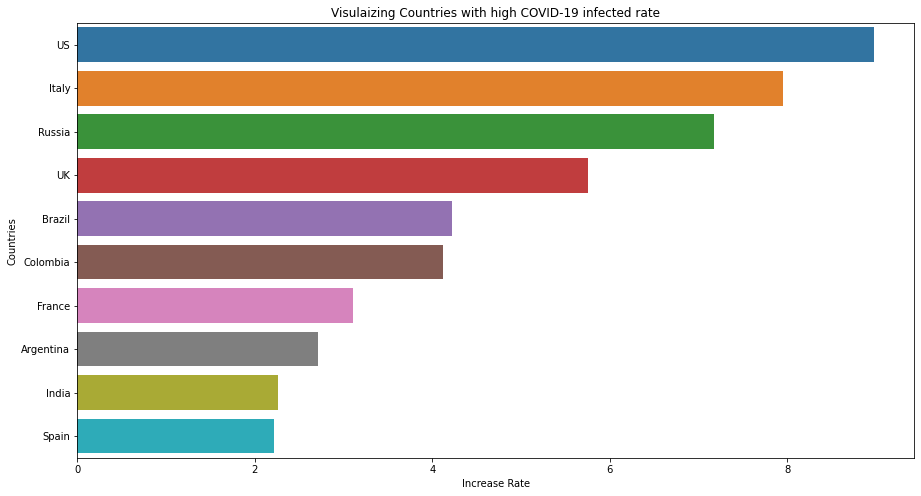

In [29]:
#Visualizing top ten countries with increased COVID-19 rate
plt.figure(figsize = (15,8))
plt.title("Visulaizing Countries with high COVID-19 infected rate")
sns.barplot(x = 'Increase Rate', y = 'Countries', data = increase_rate)
plt.show()

In [30]:
countries_overall = dataset['Country/Region'].tolist()
increase_rate_overall = {}
for x in countries_overall:
    if (x not in eleventh_month_total or x not in twelth_month_total):
        continue;
    else:
        increase_rate_overall.update({x:((twelth_month_total[x] - eleventh_month_total[x] )/ eleventh_month_total[x]) * 100})
increase_rate_overall = pd.DataFrame({'Countries':list(increase_rate_overall.keys()), 'Increase Rate': list(increase_rate_overall.values())})
increase_rate_overall = increase_rate_overall.sort_values(by = 'Increase Rate',ascending = False).head(10)

In [31]:
increase_rate_overall

,Countries,Increase Rate
169,Belize,32.712675
111,Turkey,29.654675
91,Serbia,25.202066
72,Latvia,24.819912
120,Uruguay,24.688407
57,Lithuania,21.726865
52,Estonia,21.693208
65,Azerbaijan,21.046247
157,Niger,19.896641
46,Georgia,19.833461


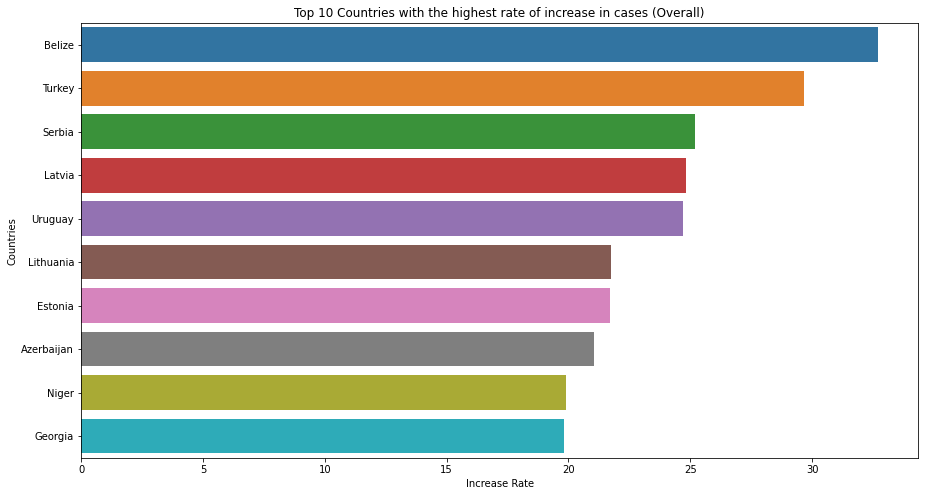

In [32]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Increase Rate', y = 'Countries', data = increase_rate_overall)
plt.title('Top 10 Countries with the highest rate of increase in cases (Overall)')
plt.show()

# Analysing recovery rates

In [33]:
eleventh_month_recovery = dataset[dataset['ObservationDate'] == '11/30/2020'].groupby(['Country/Region'])['Recovered'].sum().sort_values(ascending = False)

In [34]:
for x in eleventh_month_recovery.index.tolist():
    ratio = (eleventh_month_recovery[x]/eleventh_month_total[x]) * 100
    eleventh_month_recovery[x] = ratio   
eleventh_month_recovery = eleventh_month_recovery.sort_values(ascending = False).head(10)    

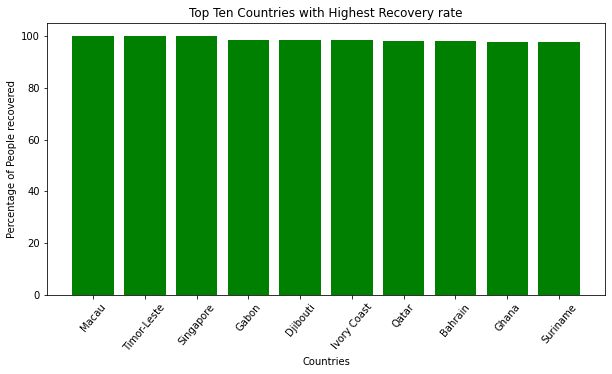

In [35]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 50)
plt.xlabel('Countries')
plt.ylabel('Percentage of People recovered')
plt.title('Top Ten Countries with Highest Recovery rate')
plt.bar(eleventh_month_recovery.index.tolist(), eleventh_month_recovery.tolist(),color = 'g',)
plt.show()

# Analysing Death rates


In [36]:
eleventh_month_deaths = dataset[dataset['ObservationDate']=='11/30/2020'].groupby(['Country/Region'])['Deaths'].sum().sort_values(ascending = False)

In [37]:
for x in eleventh_month_deaths.index.tolist():
    ratio = (eleventh_month_deaths[x]/eleventh_month_total[x]) * 100
    eleventh_month_deaths[x] = ratio   

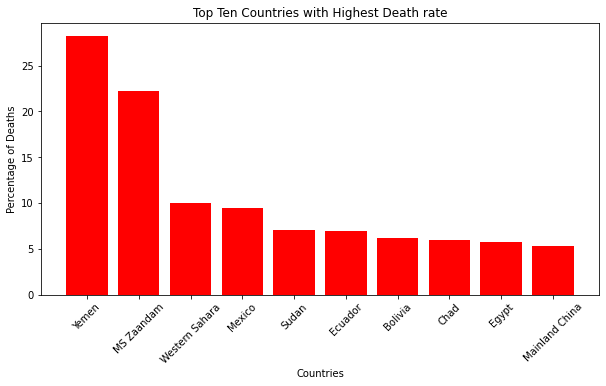

In [38]:
eleventh_month_deaths = eleventh_month_deaths.sort_values(ascending= False).head(10)
plt.figure(figsize = (10,5))
plt.xticks(rotation = 45)
plt.xlabel('Countries')
plt.ylabel('Percentage of Deaths')
plt.title('Top Ten Countries with Highest Death rate')
plt.bar(eleventh_month_deaths.index.tolist(), eleventh_month_deaths.tolist(),color = 'r',)
plt.show()

# **Analysis in India**

In [39]:
dec = dataset[dataset['ObservationDate'] == '12/06/2020']
india_cities_dec= dec[dec['Country/Region'] == 'India'][['Province/State','Confirmed']].sort_values(by = 'Confirmed', ascending = False).head(10)

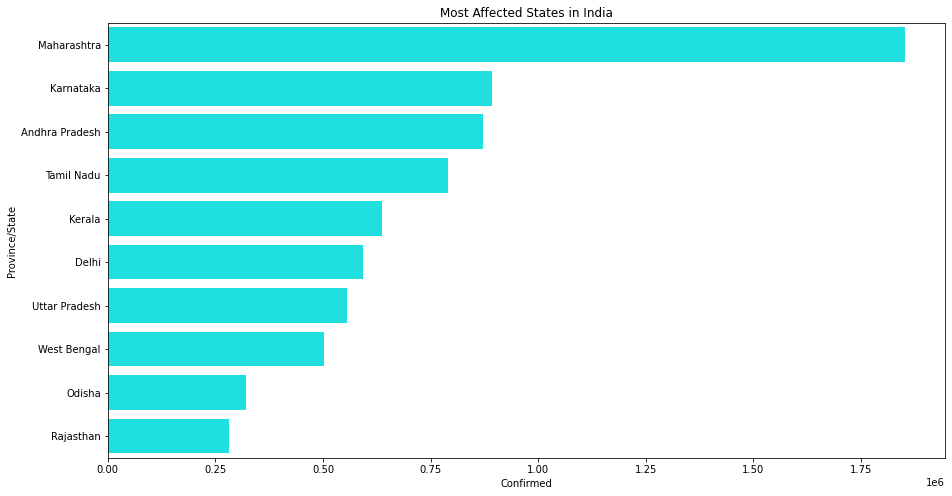

In [40]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Confirmed', y = 'Province/State', data = india_cities_dec, color = 'cyan')
plt.title('Most Affected States in India')
plt.show()

In [41]:
india_dataset = dataset[dataset['Country/Region'] == 'India']
number_of_cities = india_dataset.groupby(['ObservationDate']).size()

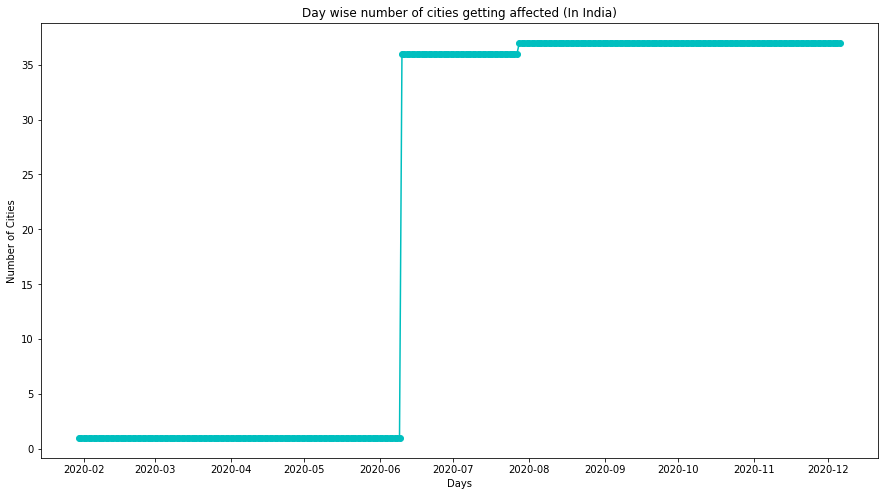

In [42]:
plt.figure(figsize = (15,8))
plt.plot(number_of_cities, color = 'c', marker = 'o')
plt.title('Day wise number of cities getting affected (In India)')
plt.xlabel('Days')
plt.ylabel('Number of Cities')
plt.show()

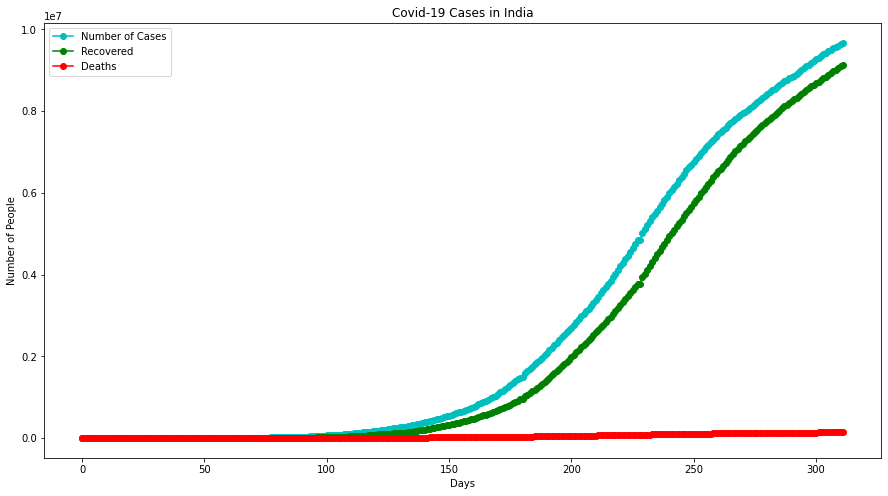

In [43]:
ind_confirmed = dataset[dataset['Country/Region'] == 'India'].groupby(['ObservationDate'])['Confirmed'].sum().tolist()
ind_recovered = dataset[dataset['Country/Region'] == 'India'].groupby(['ObservationDate'])['Recovered'].sum().tolist()
ind_deaths = dataset[dataset['Country/Region'] == 'India'].groupby(['ObservationDate'])['Deaths'].sum().tolist()
plt.figure(figsize = (15,8))
plt.plot(ind_confirmed, color = 'c', marker = 'o', label = 'Number of Cases')
plt.plot(ind_recovered, color = 'g', marker = 'o', label = 'Recovered')
plt.plot(ind_deaths, color = 'r', marker = 'o', label = 'Deaths')
plt.title('Covid-19 Cases in India')
plt.xlabel('Days')
plt.ylabel('Number of People')
plt.legend()
plt.show()

# Preprocessing and feature extraction

In [44]:
#aggregating confirmed column
dataset_pro = dataset.groupby(['ObservationDate']).agg({'Confirmed':'sum'})

In [45]:
dataset_pro

,Confirmed
ObservationDate,
2020-01-22,555.0
2020-01-23,653.0
2020-01-24,941.0
2020-01-25,1438.0
2020-01-26,2118.0
...,...
2020-12-02,64530517.0
2020-12-03,65221040.0
2020-12-04,65899441.0


In [49]:
dataset_pro.shape

(320, 1)

In [50]:
#splitting dataset into train and test data
train_data = dataset_pro[:len( dataset_pro)-20]
test_data = dataset_pro[len( dataset_pro)-20:]


In [52]:
print(f'Length of train data: {len(train_data)}\nLength of Test data: {len(test_data)}')

Length of train data: 300
Length of Test data: 20


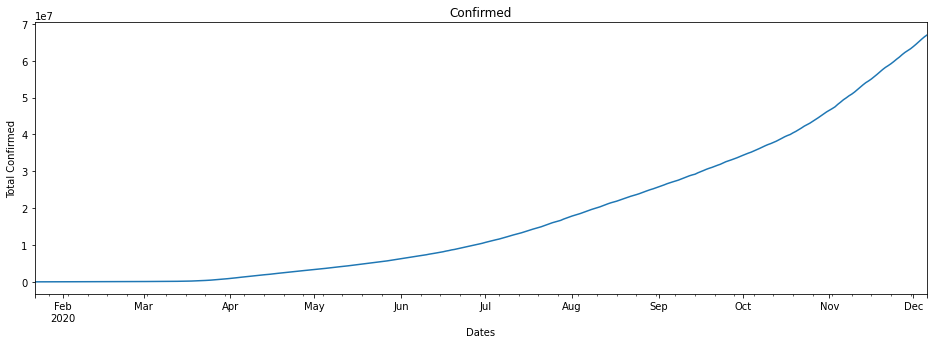

In [53]:
dataset_pro.index.freq = 'D'
ax = dataset_pro['Confirmed'].plot(figsize = (16,5), title = "Confirmed")
ax.set(xlabel='Dates', ylabel='Total Confirmed');



# Forecasting Confirmed cases



# MODEL 1 SARIMAX


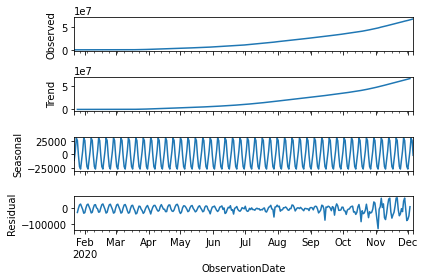

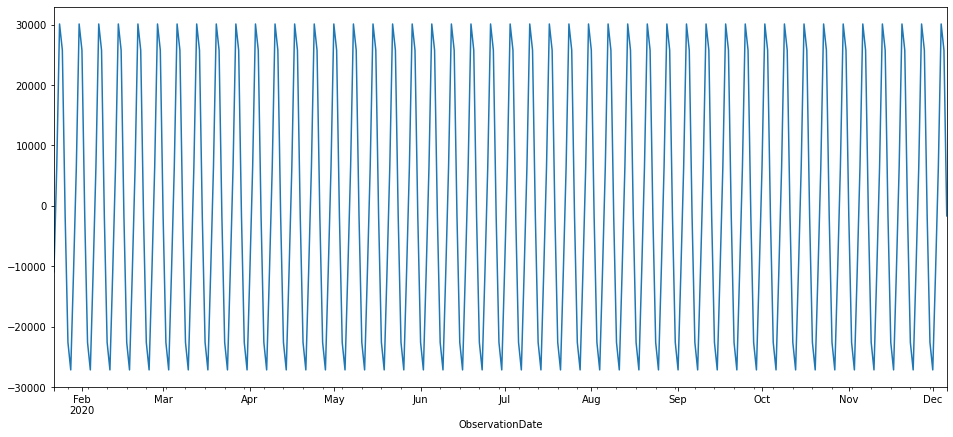

In [54]:
a = seasonal_decompose(dataset_pro["Confirmed"], model = "add")
a.plot();
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [58]:
sarima_model = SARIMAX(train_data['Confirmed'], order = (2,1,1), seasonal_order = (4,1,3,12))
sarima_result = sarima_model.fit()
sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Confirmed   No. Observations:                  300
Model:             SARIMAX(2, 1, 1)x(4, 1, 3, 12)   Log Likelihood               -3407.208
Date:                            Fri, 26 Mar 2021   AIC                           6836.415
Time:                                    10:23:57   BIC                           6876.670
Sample:                                01-22-2020   HQIC                          6852.549
                                     - 11-16-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1233      0.249      4.513      0.000       0.635       1.611
ar.L2         -0.1252      0.242     -0.518      0.605      -0.599       0.349
ma.L1         -0.7246      0.187     -3.871      0.000      -1.092      -0.358
ar.S.L12       1.2926      1.738      0.744      0.457      -2.114       4.699
ar.S.L24      -0.9592      1.190     -0.806      0.420      -3.292       1.374
ar.S.L36       0.6222      0.831      0.749      0.454      -1.006       2.251
ar.S.L48      -0.5705      0.678     -0.841      0.400      -1.900       0.759
ma.S.L12      -2.2790      1.791     -1.272      0.203      -5.790       1.232
ma.S.L24       1.9955      2.218      0.900      0.368      -2.352       6.343
ma.S.L36      -0.6035      0.941     -0.642      0.521      -2.447       1.240
sigma2          2e+09   3.15e-08   6.34e+16      0.000       2e+09       2e+09
===================================================================================
Ljung-Box (Q):                      259.19   Jarque-Bera (JB):               648.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              27.78   Skew:                             1.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.62e+33. Standard errors may be unstable.
"""

In [59]:
sarima_pred = sarima_result.predict(start =len(train_data), end = len(dataset_pro)-1, typ="levels").rename("SARIMA")
test_data['SARIMA'] = sarima_pred
#test_data.drop(['SARIMA_Predictions'],1,inplace=True)
test_data

,Confirmed,SARIMA
ObservationDate,,
2020-11-17,55679719.0,5.564769e+07
2020-11-18,56303790.0,5.622542e+07
2020-11-19,56954557.0,5.679014e+07
2020-11-20,57620415.0,5.738632e+07
2020-11-21,58206750.0,5.795845e+07
2020-11-22,58691023.0,5.851063e+07
2020-11-23,59212722.0,5.904819e+07
2020-11-24,59801025.0,5.967018e+07
2020-11-25,60434070.0,6.026440e+07


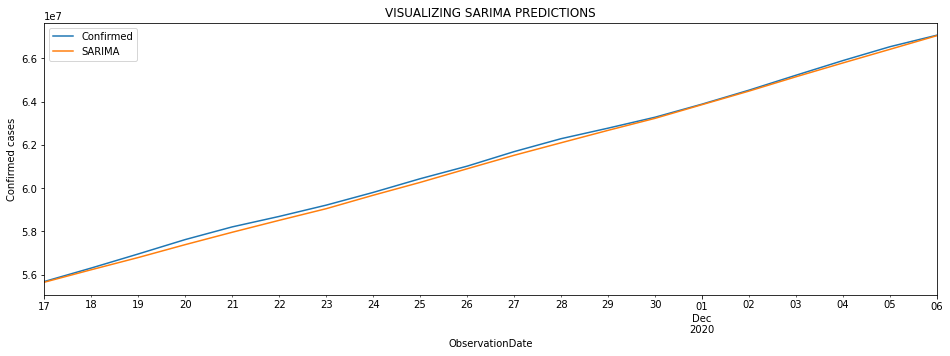

In [60]:
plt.title("VISUALIZING SARIMA PREDICTIONS")
plt.ylabel("Confirmed cases")
test_data['Confirmed'].plot(figsize = (16,5), legend=True)
test_data['SARIMA'].plot(legend = True);

In [133]:
sarima_mse_error = mean_squared_error(test_data['Confirmed'], sarima_pred)
sarima_rmse_error = math.sqrt(sarima_mse_error)
mean_value = dataset_pro['Confirmed'].mean()
sum=0
for i in range(1,20) :
    sum=sum+abs((test_data['Confirmed'].get(i)-test_data['SARIMA'].get(i))/test_data['Confirmed'].get(i))
accuracy_sarima = sum/20;
#accuracy = abs((test_data['Confirmed']-test_data['SARIMA'])/test_data['Confirmed'])*100
print(f'MSE Error: {sarima_mse_error}\nRMSE Error: {sarima_rmse_error}\nMean: {mean_value}\nAccuracy: {accuracy_sarima} ')


MSE Error: 19130019854.629433
RMSE Error: 138311.31499132467
Mean: 17911810.728125
Accuracy: 0.0019785048584476032 


# MODEL 2 HOLT



In [75]:
df_h = dataset_pro.copy()
df_h = dataset_pro.reset_index()
df_h.columns = ['ds','y'] # To use prophet column names should be like that
train_data_h = df_h.iloc[:len(df_h)-20]
test_data_h = df_h.iloc[len(df_h)-20:]
holt=Holt(np.asarray(dataset_pro["Confirmed"])).fit(smoothing_level=1.2,smoothing_slope=0.2)
y_pred = test_data_h.copy()
y_pred["Holt"]=holt.forecast(len(test_data_h))
holt_new_prediction=[]
for i in range(1,21):
   holt_new_prediction.append(holt.forecast((len(test_data_h)+i))[-1])
test_data["Holt"]=holt_new_prediction


In [76]:
test_data

,Confirmed,SARIMA,Holt
ObservationDate,,,
2020-11-17,55679719.0,5.564769e+07,7.970706e+07
2020-11-18,56303790.0,5.622542e+07,8.030953e+07
2020-11-19,56954557.0,5.679014e+07,8.091200e+07
2020-11-20,57620415.0,5.738632e+07,8.151447e+07
2020-11-21,58206750.0,5.795845e+07,8.211694e+07
2020-11-22,58691023.0,5.851063e+07,8.271941e+07
2020-11-23,59212722.0,5.904819e+07,8.332187e+07
2020-11-24,59801025.0,5.967018e+07,8.392434e+07
2020-11-25,60434070.0,6.026440e+07,8.452681e+07


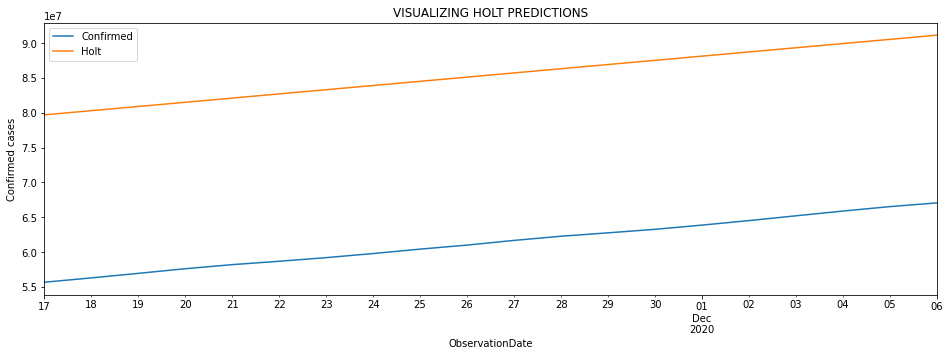

In [77]:
plt.title("VISUALIZING HOLT PREDICTIONS")
plt.ylabel("Confirmed cases")
test_data['Confirmed'].plot(figsize = (16,5), legend=True)
test_data['Holt'].plot(legend = True);

In [127]:
holt_rmse_error = rmse(test_data['Confirmed'], test_data['Holt'])
holt_mse_error = holt_rmse_error**2
mean_value = dataset_pro['Confirmed'].mean()
sum=0
for i in range(1,20) :
    sum=sum+abs((test_data['Confirmed'].get(i)-test_data['Holt'].get(i))/test_data['Confirmed'].get(i))
accuracy_holt = sum/20;
#accuracy_holt= abs((test_data['Confirmed']-test_data['Holt'])/test_data['Confirmed'])*100
print(f'MSE Error: {holt_mse_error}\nRMSE Error: {holt_rmse_error}\nMean: {mean_value}\nAccuracy: {accuracy_holt}')


MSE Error: 579653393032409.0
RMSE Error: 24075992.046692677
Mean: 17911810.728125
Accuracy: 0.3720062529034075


# MODEL 3 LSTM


In [84]:
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)
n_input = 20
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [85]:
lstm_model.fit_generator(generator,epochs=10)

Epoch 1/10
280/280 [==============================] - 6s 18ms/step - loss: 0.0134
Epoch 2/10
280/280 [==============================] - 5s 17ms/step - loss: 0.0026
Epoch 3/10
280/280 [==============================] - 5s 18ms/step - loss: 3.3472e-05
Epoch 4/10
280/280 [==============================] - 5s 17ms/step - loss: 2.7318e-05
Epoch 5/10
280/280 [==============================] - 5s 17ms/step - loss: 1.2186e-04
Epoch 6/10
280/280 [==============================] - 5s 17ms/step - loss: 6.3987e-05
Epoch 7/10
280/280 [==============================] - 5s 17ms/step - loss: 2.2812e-04
Epoch 8/10
280/280 [==============================] - 5s 17ms/step - loss: 0.0014
Epoch 9/10
280/280 [==============================] - 5s 17ms/step - loss: 4.4017e-05
Epoch 10/10
280/280 [==============================] - 5s 17ms/step - loss: 9.0679e-06


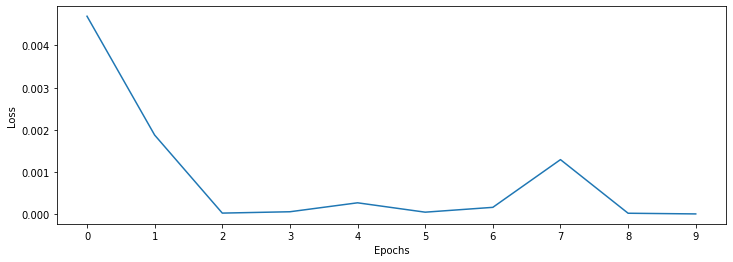

In [86]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [87]:
lstm_predictions_scaled = list()
batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))
for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
test_data['LSTM']= lstm_predictions

In [88]:
test_data

,Confirmed,SARIMA,Holt,LSTM
ObservationDate,,,,
2020-11-17,55679719.0,5.564769e+07,7.970706e+07,5.703477e+07
2020-11-18,56303790.0,5.622542e+07,8.030953e+07,5.794184e+07
2020-11-19,56954557.0,5.679014e+07,8.091200e+07,5.887215e+07
2020-11-20,57620415.0,5.738632e+07,8.151447e+07,5.983826e+07
2020-11-21,58206750.0,5.795845e+07,8.211694e+07,6.083837e+07
2020-11-22,58691023.0,5.851063e+07,8.271941e+07,6.187225e+07
2020-11-23,59212722.0,5.904819e+07,8.332187e+07,6.293991e+07
2020-11-24,59801025.0,5.967018e+07,8.392434e+07,6.403905e+07
2020-11-25,60434070.0,6.026440e+07,8.452681e+07,6.517352e+07


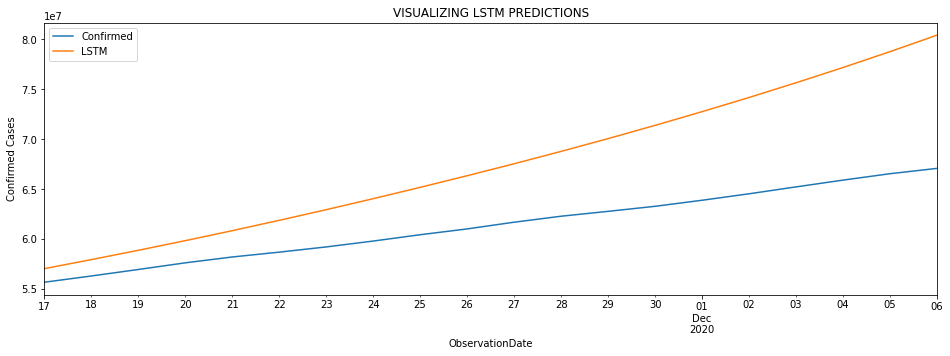

In [89]:
plt.title("VISUALIZING LSTM PREDICTIONS")
plt.ylabel("Confirmed Cases")
test_data['Confirmed'].plot(figsize = (16,5), legend=True)
test_data['LSTM'].plot(legend = True);

In [128]:
lstm_rmse_error = rmse(test_data['Confirmed'], test_data["LSTM"])
lstm_mse_error = lstm_rmse_error**2
mean_value = dataset_pro['Confirmed'].mean()
sum=0
for i in range(1,20) :
    sum=sum+abs((test_data['Confirmed'].get(i)-test_data['LSTM'].get(i))/test_data['Confirmed'].get(i))
accuracy_lstm = sum/20;
#accuracy_lstm =abs((test_data['Confirmed']-test_data['LSTM'])/test_data['Confirmed'])*100
print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}\nAccuracy: {accuracy_lstm}')

MSE Error: 52072535957953.14
RMSE Error: 7216130.261986208
Mean: 17911810.728125
Accuracy: 0.0972053784357404


# MODEL 4 GRU

In [93]:
from keras.optimizers import SGD
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=100, return_sequences=True, input_shape=(n_input,1), activation='relu'))
#regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=100, return_sequences=True, input_shape=(n_input,1), activation='relu'))
regressorGRU.add(GRU(units=100, activation='relu'))
#regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit_generator(generator,epochs=20)


Epoch 1/20
280/280 [==============================] - 12s 27ms/step - loss: 0.0569
Epoch 2/20
280/280 [==============================] - 7s 27ms/step - loss: 5.4865e-05
Epoch 3/20
280/280 [==============================] - 8s 27ms/step - loss: 2.3282e-05
Epoch 4/20
280/280 [==============================] - 7s 27ms/step - loss: 1.0347e-05
Epoch 5/20
280/280 [==============================] - 7s 26ms/step - loss: 1.6515e-05
Epoch 6/20
280/280 [==============================] - 7s 26ms/step - loss: 1.2371e-05
Epoch 7/20
280/280 [==============================] - 7s 26ms/step - loss: 9.7091e-06
Epoch 8/20
280/280 [==============================] - 7s 26ms/step - loss: 9.3847e-06
Epoch 9/20
280/280 [==============================] - 7s 26ms/step - loss: 6.8358e-06
Epoch 10/20
280/280 [==============================] - 7s 26ms/step - loss: 7.1188e-06
Epoch 11/20
280/280 [==============================] - 7s 26ms/step - loss: 5.9067e-06
Epoch 12/20
280/280 [==============================] - 

In [99]:
inputs = dataset_pro[len(dataset_pro) - len(test_data) - 80:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(80, 100):
    X_test.append(inputs[i-80:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_confirmed = regressorGRU.predict(X_test)
GRU_predicted_confirmed = scaler.inverse_transform(GRU_predicted_confirmed)


In [100]:
test_data['GRU']=GRU_predicted_confirmed

test_data

,Confirmed,SARIMA,Holt,LSTM,GRU
ObservationDate,,,,,
2020-11-17,55679719.0,5.564769e+07,7.970706e+07,5.703477e+07,55653904.0
2020-11-18,56303790.0,5.622542e+07,8.030953e+07,5.794184e+07,56123316.0
2020-11-19,56954557.0,5.679014e+07,8.091200e+07,5.887215e+07,56571276.0
2020-11-20,57620415.0,5.738632e+07,8.151447e+07,5.983826e+07,57010584.0
2020-11-21,58206750.0,5.795845e+07,8.211694e+07,6.083837e+07,57450452.0
2020-11-22,58691023.0,5.851063e+07,8.271941e+07,6.187225e+07,57885064.0
2020-11-23,59212722.0,5.904819e+07,8.332187e+07,6.293991e+07,58307660.0
2020-11-24,59801025.0,5.967018e+07,8.392434e+07,6.403905e+07,58712240.0
2020-11-25,60434070.0,6.026440e+07,8.452681e+07,6.517352e+07,59103256.0


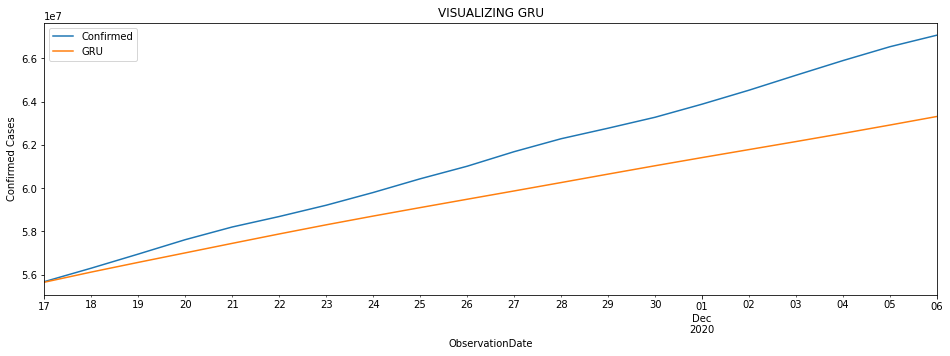

In [101]:
plt.title("VISUALIZING GRU PREDICTIONS")
plt.ylabel("Confirmed Cases")
test_data['Confirmed'].plot(figsize = (16,5), legend=True)
test_data['GRU'].plot(legend = True)

In [129]:
gru_rmse_error = rmse(test_data['Confirmed'], test_data["GRU"])
gru_mse_error = gru_rmse_error**2
mean_value = dataset_pro['Confirmed'].mean()
sum=0
for i in range(1,20) :
    sum=sum+abs((test_data['Confirmed'].get(i)-test_data['GRU'].get(i))/test_data['Confirmed'].get(i))
accuracy_gru = sum/20;
#accuracy_gru = abs((test_data['Confirmed']-test_data['GRU'])/test_data['Confirmed'])*100
print(f'MSE Error: {gru_mse_error}\nRMSE Error: {gru_rmse_error}\nMean: {mean_value}\nAccuracy: {accuracy_gru}')

MSE Error: 4318530988270.25
RMSE Error: 2078107.5497361175
Mean: 17911810.728125
Accuracy: 0.02742885210485055



# MODEL 5 PROPHET

In [106]:
df_pr = dataset_pro.copy()
df_pr = dataset_pro.reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(dataset_pro)-20]
test_data_pr = df_pr.iloc[len(dataset_pro)-20:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=20,freq='D')
prophet_pred = m.predict(future)
prophet_pred.tail()
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-20:]['ds'], "Pred" : prophet_pred[-20:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "D"
test_data["Prophet"] = prophet_pred['Pred'].values
test_data

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,Confirmed,SARIMA,Holt,LSTM,GRU,Prophet
ObservationDate,,,,,,
2020-11-17,55679719.0,5.564769e+07,7.970706e+07,5.703477e+07,55653904.0,5.313919e+07
2020-11-18,56303790.0,5.622542e+07,8.030953e+07,5.794184e+07,56123316.0,5.355805e+07
2020-11-19,56954557.0,5.679014e+07,8.091200e+07,5.887215e+07,56571276.0,5.397673e+07
2020-11-20,57620415.0,5.738632e+07,8.151447e+07,5.983826e+07,57010584.0,5.439721e+07
2020-11-21,58206750.0,5.795845e+07,8.211694e+07,6.083837e+07,57450452.0,5.479410e+07
2020-11-22,58691023.0,5.851063e+07,8.271941e+07,6.187225e+07,57885064.0,5.517287e+07
2020-11-23,59212722.0,5.904819e+07,8.332187e+07,6.293991e+07,58307660.0,5.555779e+07
2020-11-24,59801025.0,5.967018e+07,8.392434e+07,6.403905e+07,58712240.0,5.589956e+07
2020-11-25,60434070.0,6.026440e+07,8.452681e+07,6.517352e+07,59103256.0,5.631843e+07


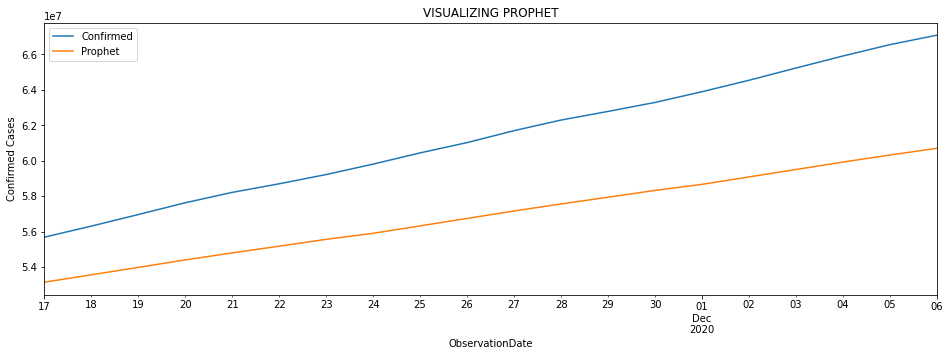

In [107]:
plt.title("VISUALIZING PROPHET PREDICTIONS")
plt.ylabel("Confirmed Cases")
test_data['Confirmed'].plot(figsize = (16,5), legend=True)
test_data['Prophet'].plot(legend = True);

In [130]:
prophet_rmse_error = rmse(test_data['Confirmed'], test_data["Prophet"])
prophet_mse_error = prophet_rmse_error**2
mean_value = dataset_pro['Confirmed'].mean()
sum=0
for i in range(1,20) :
    sum=sum+abs((test_data['Confirmed'].get(i)-test_data['Prophet'].get(i))/test_data['Confirmed'].get(i))
accuracy_prophet = sum/20;
#accuracy_prophet=abs((test_data['Confirmed']-test_data['Prophet'])/test_data['Confirmed'])*100
print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}\nAccuracy: {accuracy_prophet}')

MSE Error: 20852508709135.887
RMSE Error: 4566454.719926158
Mean: 17911810.728125
Accuracy: 0.068955385305682


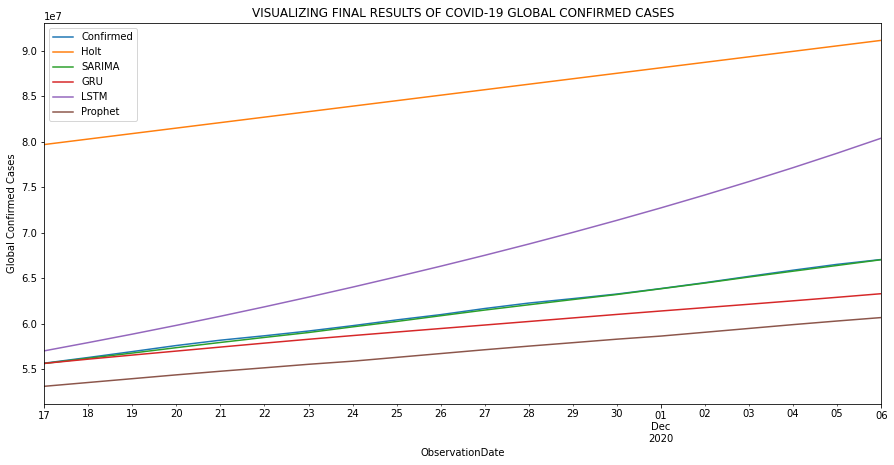

In [136]:
rmse_errors = [holt_rmse_error, lstm_rmse_error, gru_mse_error,prophet_rmse_error,sarima_rmse_error]
mse_errors = [holt_mse_error,  lstm_mse_error, gru_mse_error,prophet_mse_error,sarima_mse_error]
accuracy_confirmed = [accuracy_holt, accuracy_lstm, accuracy_gru, accuracy_prophet, accuracy_sarima]
errors = pd.DataFrame({"Models" : ["Holt","LSTM","GRU","Prophet","SARIMA"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors, "Accuracy(MEAN ABSOLUTE PERCENTAGE ERROR)" : accuracy_confirmed})
plt.figure(figsize=(15,7))
plt.title("VISUALIZING FINAL RESULTS OF COVID-19 GLOBAL CONFIRMED CASES")
plt.ylabel("Global Confirmed Cases")
test_data['Confirmed'].plot(legend=True)
test_data['Holt'].plot(legend = True);
test_data['SARIMA'].plot(legend = True);
test_data['GRU'].plot(legend = True);
test_data['LSTM'].plot(legend = True);
test_data['Prophet'].plot(legend = True);
plt.show()

In [137]:
print(f"Mean: {test_data['Confirmed'].mean()}")
errors

Mean: 61354722.25


,Models,RMSE Errors,MSE Errors,Accuracy(MEAN ABSOLUTE PERCENTAGE ERROR)
0,Holt,2.407599e+07,5.796534e+14,0.372006
1,LSTM,7.216130e+06,5.207254e+13,0.097205
2,GRU,4.318531e+12,4.318531e+12,0.027429
3,Prophet,4.566455e+06,2.085251e+13,0.068955
4,SARIMA,1.383113e+05,1.913002e+10,0.001979


In [138]:
test_data

,Confirmed,SARIMA,Holt,LSTM,GRU,Prophet
ObservationDate,,,,,,
2020-11-17,55679719.0,5.564769e+07,7.970706e+07,5.703477e+07,55653904.0,5.313919e+07
2020-11-18,56303790.0,5.622542e+07,8.030953e+07,5.794184e+07,56123316.0,5.355805e+07
2020-11-19,56954557.0,5.679014e+07,8.091200e+07,5.887215e+07,56571276.0,5.397673e+07
2020-11-20,57620415.0,5.738632e+07,8.151447e+07,5.983826e+07,57010584.0,5.439721e+07
2020-11-21,58206750.0,5.795845e+07,8.211694e+07,6.083837e+07,57450452.0,5.479410e+07
2020-11-22,58691023.0,5.851063e+07,8.271941e+07,6.187225e+07,57885064.0,5.517287e+07
2020-11-23,59212722.0,5.904819e+07,8.332187e+07,6.293991e+07,58307660.0,5.555779e+07
2020-11-24,59801025.0,5.967018e+07,8.392434e+07,6.403905e+07,58712240.0,5.589956e+07
2020-11-25,60434070.0,6.026440e+07,8.452681e+07,6.517352e+07,59103256.0,5.631843e+07


# Forecasting Recovered Cases


In [113]:
#aggregating recovered column
dataset_rec = dataset.groupby(['ObservationDate']).agg({'Recovered':'sum'})

In [114]:
dataset_rec.shape

(320, 1)

In [117]:
train_rec_data = dataset_rec[:len( dataset_rec)-20]
test_rec_data = dataset_rec[len( dataset_rec)-20:]
print(f'Length of train data: {len(train_rec_data)}\nLength of Test data: {len(test_rec_data)}')

Length of train data: 300
Length of Test data: 20


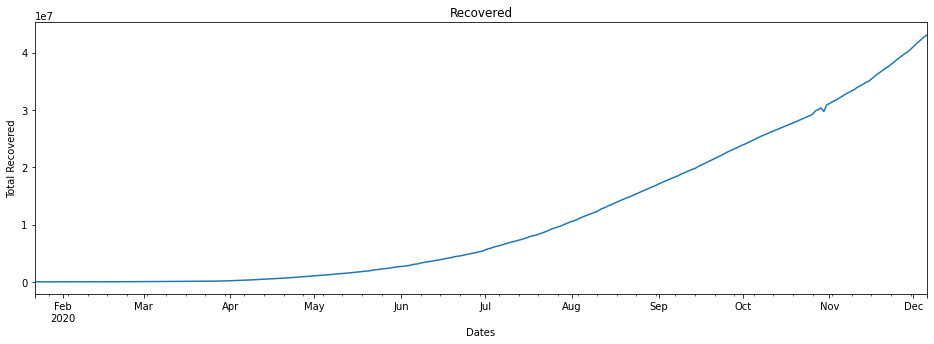

In [118]:
dataset_rec.index.freq = 'D'
ax = dataset_rec['Recovered'].plot(figsize = (16,5), title = "Recovered")
ax.set(xlabel='Dates', ylabel='Total Recovered');

# MODEL 1 SARIMAX

,Recovered,SARIMA
ObservationDate,,
2020-11-17,35812940.0,3.569022e+07
2020-11-18,36176087.0,3.596027e+07
2020-11-19,36549174.0,3.593335e+07
2020-11-20,36904549.0,3.653182e+07
2020-11-21,37243768.0,3.680358e+07
2020-11-22,37516165.0,3.708889e+07
2020-11-23,37926212.0,3.736925e+07
2020-11-24,38297744.0,3.765870e+07
2020-11-25,38734721.0,3.795691e+07


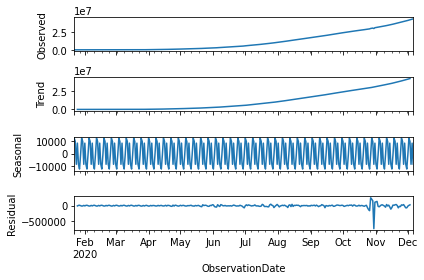

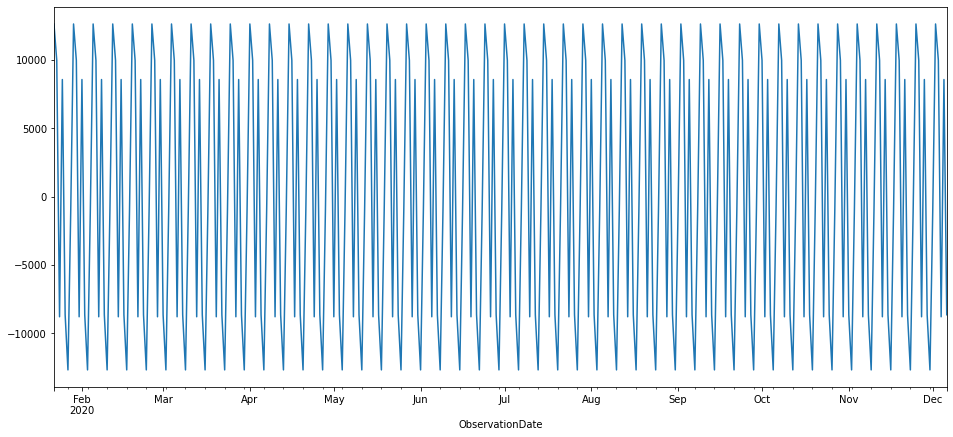

In [119]:
a1 = seasonal_decompose(dataset_rec['Recovered'], model = "add")
a1.plot();
plt.figure(figsize = (16,7))
a1.seasonal.plot();
sarima_model_r = SARIMAX(train_rec_data['Recovered'], order = (2,2,1), seasonal_order = (4,1,3,20))
sarima_result_r = sarima_model_r.fit()
sarima_result_r.summary()
sarima_pred_r = sarima_result_r.predict(start =len(train_rec_data), end = len(dataset_rec)-1, typ="levels").rename("SARIMA Predictions")
test_rec_data['SARIMA'] = sarima_pred_r
test_rec_data

MSE Error: 1239413260020.5356
RMSE Error: 1113289.3873654485
Mean: 11334226.753125
Accuracy: 0.02374442284948501 


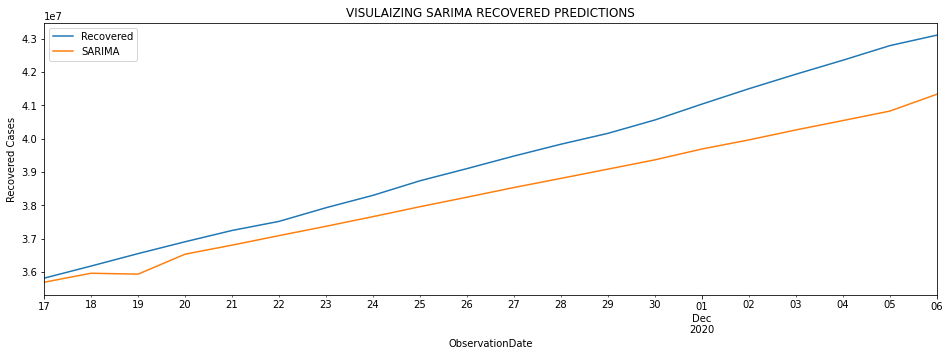

In [145]:
plt.title("VISULAIZING SARIMA RECOVERED PREDICTIONS")
plt.ylabel("Recovered Cases")
test_rec_data['Recovered'].plot(figsize = (16,5), legend=True)
test_rec_data['SARIMA'].plot(legend = True);
rsarima_mse_error = mean_squared_error(test_rec_data['Recovered'], sarima_pred_r)
rsarima_rmse_error = math.sqrt(rsarima_mse_error)
rmean_value = dataset_rec['Recovered'].mean()
sum=0;
for i in range(1,20) :
    sum=sum+abs((test_rec_data['Recovered'].get(i)-test_rec_data['SARIMA'].get(i))/test_rec_data['Recovered'].get(i))
raccuracy_sarima = sum/20;
#raccuracy = abs((test_rec_data['Recovered']-test_rec_data['SARIMA'])/test_rec_data['Recovered'])*100
print(f'MSE Error: {rsarima_mse_error}\nRMSE Error: {rsarima_rmse_error}\nMean: {rmean_value}\nAccuracy: {raccuracy_sarima} ')


# MODEL 2 HOLT

In [140]:
df_hr= dataset_rec.copy()
df_hr = dataset_rec.reset_index()
df_hr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_hr = df_hr.iloc[:len(dataset_rec)-20]
test_data_hr = df_hr.iloc[len(dataset_rec)-20:]
holtr=Holt(np.asarray(dataset_rec["Recovered"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred_r = test_data_hr.copy()
y_pred_r["Holt"]=holtr.forecast(len(test_data_hr))
holt_new_prediction_r=[]
for i in range(1,21):
   holt_new_prediction_r.append(holtr.forecast((len(test_data_hr)+i))[-1])
test_rec_data["Holt"]=holt_new_prediction_r
test_rec_data


,Recovered,SARIMA,Holt
ObservationDate,,,
2020-11-17,35812940.0,3.569022e+07,5.115165e+07
2020-11-18,36176087.0,3.596027e+07,5.153705e+07
2020-11-19,36549174.0,3.593335e+07,5.192245e+07
2020-11-20,36904549.0,3.653182e+07,5.230785e+07
2020-11-21,37243768.0,3.680358e+07,5.269324e+07
2020-11-22,37516165.0,3.708889e+07,5.307864e+07
2020-11-23,37926212.0,3.736925e+07,5.346404e+07
2020-11-24,38297744.0,3.765870e+07,5.384944e+07
2020-11-25,38734721.0,3.795691e+07,5.423484e+07


MSE Error: 239117447142542.7
RMSE Error: 15463422.87925098
Mean: 11334226.753125
Accuracy: 0.3728131679488815


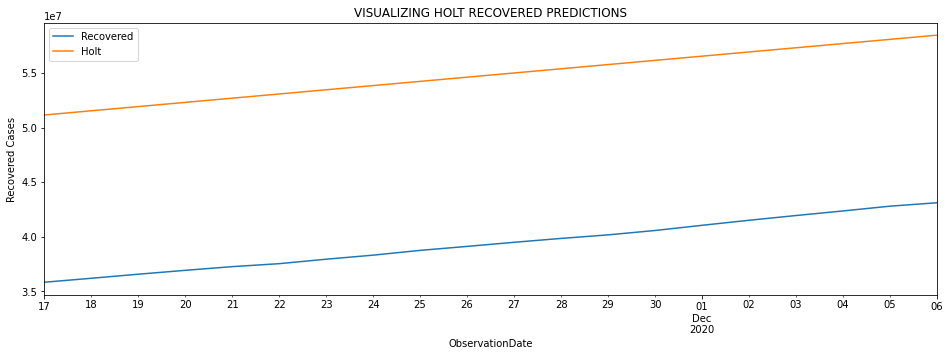

In [146]:
plt.title("VISUALIZING HOLT RECOVERED PREDICTIONS")
plt.ylabel("Recovered Cases")
test_rec_data['Recovered'].plot(figsize = (16,5), legend=True)
test_rec_data['Holt'].plot(legend = True);
rholt_rmse_error = rmse(test_rec_data['Recovered'], holt_new_prediction_r)
rholt_mse_error = rholt_rmse_error**2
rmean_value = dataset_rec['Recovered'].mean()
sum=0;
for i in range(1,20) :
    sum=sum+abs((test_rec_data['Recovered'].get(i)-test_rec_data['Holt'].get(i))/test_rec_data['Recovered'].get(i))
raccuracy_holt= sum/20;
#raccuracy_holt= (test_rec_data['Holt']/test_rec_data['Recovered'])*100
print(f'MSE Error: {rholt_mse_error}\nRMSE Error: {rholt_rmse_error}\nMean: {rmean_value}\nAccuracy: {raccuracy_holt}')


# MODEL 3 LSTM

In [144]:
scaler = MinMaxScaler()
scaler.fit(train_rec_data)
scaled_trainrec_data = scaler.transform(train_rec_data)
scaled_testrec_data = scaler.transform(test_rec_data)
n_input = 20
n_features= 1
generator = TimeseriesGenerator(scaled_trainrec_data, scaled_trainrec_data, length=n_input, batch_size=1)
lstm_model_r = Sequential()
lstm_model_r.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model_r.add(Dense(1))
lstm_model_r.compile(optimizer='adam', loss='mse')

lstm_model_r.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
280/280 [==============================] - 6s 18ms/step - loss: 0.0196
Epoch 2/10
280/280 [==============================] - 5s 18ms/step - loss: 1.0892e-05
Epoch 3/10
280/280 [==============================] - 5s 18ms/step - loss: 2.5653e-05
Epoch 4/10
280/280 [==============================] - 5s 18ms/step - loss: 1.7511e-05
Epoch 5/10
280/280 [==============================] - 5s 18ms/step - loss: 3.3838e-05
Epoch 6/10
280/280 [==============================] - 5s 18ms/step - loss: 0.0016
Epoch 7/10
280/280 [==============================] - 5s 17ms/step - loss: 5.7660e-05
Epoch 8/10
280/280 [==============================] - 5s 18ms/step - loss: 1.0758e-04
Epoch 9/10
280/280 [==============================] - 5s 18ms/step - loss: 1.1976e-04
Epoch 10/10
280/280 [==============================] - 5s 18ms/step - loss: 0.0054


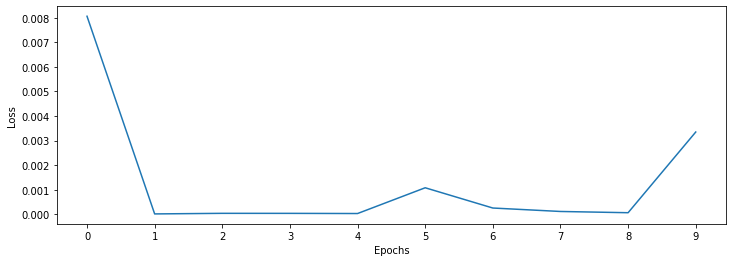

In [150]:
lstm_model_r.fit_generator(generator,epochs=10)
losses_lstmr = lstm_model_r.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstmr);

In [151]:
lstm_predictions_scaled_r = list()
batch = scaled_trainrec_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))
for i in range(len(test_rec_data)):   
    lstm_pred_r = lstm_model_r.predict(current_batch)[0]
    lstm_predictions_scaled_r.append(lstm_pred_r) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred_r]],axis=1)
lstm_predictions_r = scaler.inverse_transform(lstm_predictions_scaled_r)
test_rec_data['LSTM']= lstm_predictions_r
test_rec_data

,Recovered,SARIMA,Holt,LSTM
ObservationDate,,,,
2020-11-17,35812940.0,3.569022e+07,5.115165e+07,3.529783e+07
2020-11-18,36176087.0,3.596027e+07,5.153705e+07,3.551694e+07
2020-11-19,36549174.0,3.593335e+07,5.192245e+07,3.573592e+07
2020-11-20,36904549.0,3.653182e+07,5.230785e+07,3.595500e+07
2020-11-21,37243768.0,3.680358e+07,5.269324e+07,3.617032e+07
2020-11-22,37516165.0,3.708889e+07,5.307864e+07,3.638430e+07
2020-11-23,37926212.0,3.736925e+07,5.346404e+07,3.659703e+07
2020-11-24,38297744.0,3.765870e+07,5.384944e+07,3.680868e+07
2020-11-25,38734721.0,3.795691e+07,5.423484e+07,3.702010e+07


MSE Error: 5135401586273.026
RMSE Error: 2266142.44615669
Mean: 11334226.753125
Accuracy: 0.04946760041259726


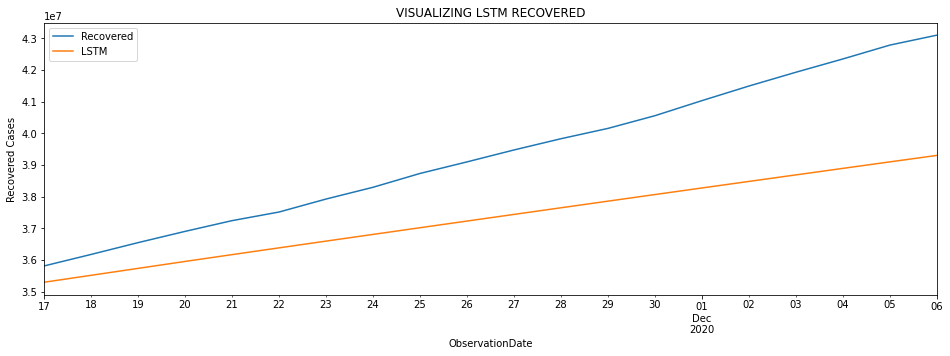

In [152]:
plt.title("VISUALIZING LSTM RECOVERED")
plt.ylabel("Recovered Cases")
test_rec_data['Recovered'].plot(figsize = (16,5), legend=True)
test_rec_data['LSTM'].plot(legend = True);
rlstm_rmse_error = rmse(test_rec_data['Recovered'], test_rec_data["LSTM"])
rlstm_mse_error = rlstm_rmse_error**2
rmean_value = dataset_rec['Recovered'].mean()
sum=0;
for i in range(1,20) :
    sum=sum+abs((test_rec_data['Recovered'].get(i)-test_rec_data['LSTM'].get(i))/test_rec_data['Recovered'].get(i))
raccuracy_lstm = sum/20;
#raccuracy_lstm = ((test_rec_data['LSTM'])/test_rec_data['Recovered'])*100
print(f'MSE Error: {rlstm_mse_error}\nRMSE Error: {rlstm_rmse_error}\nMean: {rmean_value}\nAccuracy: {raccuracy_lstm}')

# MODEL 4 GRU

In [153]:
from keras.optimizers import SGD
rregressorGRU = Sequential()
# First GRU layer with Dropout regularisation
rregressorGRU.add(GRU(units=200, return_sequences=True, input_shape=(n_input,1), activation='relu'))
rregressorGRU.add(GRU(units=200, activation='relu'))
# The output layer
rregressorGRU.add(Dense(units=1))
# Compiling the RNN
rregressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
rregressorGRU.fit_generator(generator,epochs=20)


Epoch 1/20
280/280 [==============================] - 14s 38ms/step - loss: 0.0577
Epoch 2/20
280/280 [==============================] - 11s 38ms/step - loss: 3.4921e-05
Epoch 3/20
280/280 [==============================] - 11s 38ms/step - loss: 1.7241e-05
Epoch 4/20
280/280 [==============================] - 11s 38ms/step - loss: 1.8417e-05
Epoch 5/20
280/280 [==============================] - 11s 38ms/step - loss: 1.0714e-05
Epoch 6/20
280/280 [==============================] - 11s 38ms/step - loss: 1.0173e-05
Epoch 7/20
280/280 [==============================] - 11s 38ms/step - loss: 9.2982e-06
Epoch 8/20
280/280 [==============================] - 11s 38ms/step - loss: 8.5196e-06
Epoch 9/20
280/280 [==============================] - 11s 38ms/step - loss: 8.3379e-06
Epoch 10/20
280/280 [==============================] - 11s 39ms/step - loss: 7.6486e-06
Epoch 11/20
280/280 [==============================] - 11s 38ms/step - loss: 6.4653e-06
Epoch 12/20
280/280 [========================

In [156]:
inputs_r = dataset_rec[len(dataset_rec) - len(test_rec_data) - 80:].values
inputs_r = inputs_r.reshape(-1,1)
inputs_r = scaler.transform(inputs_r)
X_test_r = []
for i in range(80, 100):
    X_test_r.append(inputs_r[i-80:i,0])
X_test_r = np.array(X_test_r)
X_test_r = np.reshape(X_test_r, (X_test_r.shape[0],X_test_r.shape[1],1))
GRU_predicted_recovered = rregressorGRU.predict(X_test_r)
GRU_predicted_recovered = scaler.inverse_transform(GRU_predicted_recovered)
test_rec_data['GRU']=GRU_predicted_recovered
test_rec_data


,Recovered,SARIMA,Holt,LSTM,GRU
ObservationDate,,,,,
2020-11-17,35812940.0,3.569022e+07,5.115165e+07,3.529783e+07,35506748.0
2020-11-18,36176087.0,3.596027e+07,5.153705e+07,3.551694e+07,35789720.0
2020-11-19,36549174.0,3.593335e+07,5.192245e+07,3.573592e+07,36073832.0
2020-11-20,36904549.0,3.653182e+07,5.230785e+07,3.595500e+07,36358196.0
2020-11-21,37243768.0,3.680358e+07,5.269324e+07,3.617032e+07,36639456.0
2020-11-22,37516165.0,3.708889e+07,5.307864e+07,3.638430e+07,36914648.0
2020-11-23,37926212.0,3.736925e+07,5.346404e+07,3.659703e+07,37173456.0
2020-11-24,38297744.0,3.765870e+07,5.384944e+07,3.680868e+07,37438664.0
2020-11-25,38734721.0,3.795691e+07,5.423484e+07,3.702010e+07,37709172.0


MSE Error: 5135401586273.026
RMSE Error: 2266142.44615669
Mean: 11334226.753125
Accuracy: 0.029091253416636032


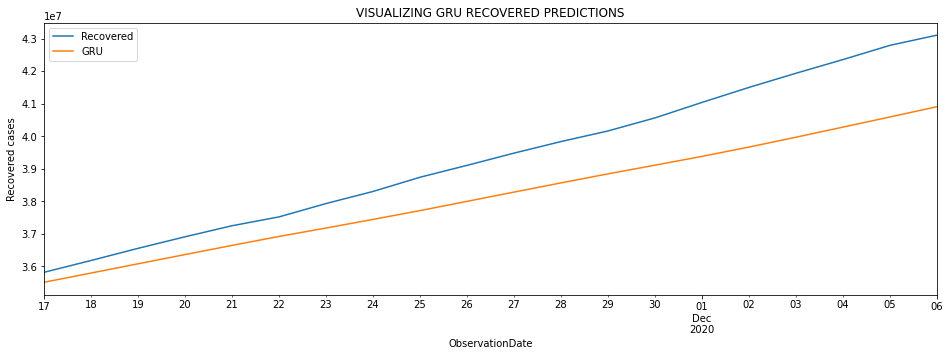

In [157]:
plt.title("VISUALIZING GRU RECOVERED PREDICTIONS")
plt.ylabel("Recovered cases")
test_rec_data['Recovered'].plot(figsize = (16,5), legend=True)
test_rec_data['GRU'].plot(legend = True)
rgru_rmse_error = rmse(test_rec_data['Recovered'], test_rec_data["GRU"])
rgru_mse_error = rgru_rmse_error**2
rmean_value = dataset_rec['Recovered'].mean()
sum=0;
for i in range(1,20) :
    sum=sum+abs((test_rec_data['Recovered'].get(i)-test_rec_data['GRU'].get(i))/test_rec_data['Recovered'].get(i))
raccuracy_gru= sum/20;
#raccuracy_gru = ((test_rec_data['GRU'])/test_rec_data['Recovered'])*100
print(f'MSE Error: {rlstm_mse_error}\nRMSE Error: {rlstm_rmse_error}\nMean: {rmean_value}\nAccuracy: {raccuracy_gru}')

# MODEL 5 PROPHET

In [159]:
df_prr = dataset_rec.copy()
df_prr = dataset_rec.reset_index()
df_prr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_prr = df_prr.iloc[:len(dataset_rec)-20]
test_data_prr = df_prr.iloc[len(dataset_rec)-20:]
mr = Prophet()
mr.fit(train_data_prr)
future_r = mr.make_future_dataframe(periods=20,freq='D')
prophet_pred_r = mr.predict(future)
prophet_pred_r.tail()
prophet_pred_r = pd.DataFrame({"Date" : prophet_pred_r[-20:]['ds'], "Pred" : prophet_pred_r[-20:]["yhat"]})
prophet_pred_r = prophet_pred_r.set_index("Date")
prophet_pred_r.index.freq = "D"
test_rec_data["Prophet"] = prophet_pred_r['Pred'].values
test_rec_data

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,Recovered,SARIMA,Holt,LSTM,GRU,Prophet
ObservationDate,,,,,,
2020-11-17,35812940.0,3.569022e+07,5.115165e+07,3.529783e+07,35506748.0,3.498653e+07
2020-11-18,36176087.0,3.596027e+07,5.153705e+07,3.551694e+07,35789720.0,3.523911e+07
2020-11-19,36549174.0,3.593335e+07,5.192245e+07,3.573592e+07,36073832.0,3.547624e+07
2020-11-20,36904549.0,3.653182e+07,5.230785e+07,3.595500e+07,36358196.0,3.569844e+07
2020-11-21,37243768.0,3.680358e+07,5.269324e+07,3.617032e+07,36639456.0,3.595836e+07
2020-11-22,37516165.0,3.708889e+07,5.307864e+07,3.638430e+07,36914648.0,3.618555e+07
2020-11-23,37926212.0,3.736925e+07,5.346404e+07,3.659703e+07,37173456.0,3.642253e+07
2020-11-24,38297744.0,3.765870e+07,5.384944e+07,3.680868e+07,37438664.0,3.665680e+07
2020-11-25,38734721.0,3.795691e+07,5.423484e+07,3.702010e+07,37709172.0,3.690939e+07


MSE Error: 5094009660930.276
RMSE Error: 2256991.2850807104
Mean: 11334226.753125
Accuracy: 0.050886598534784354


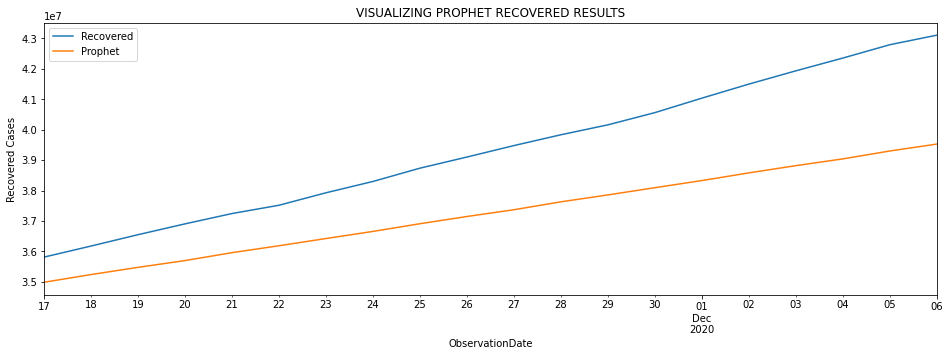

In [160]:
plt.title("VISUALIZING PROPHET RECOVERED RESULTS")
plt.ylabel("Recovered Cases")
test_rec_data['Recovered'].plot(figsize = (16,5), legend=True)
test_rec_data['Prophet'].plot(legend = True);
rprophet_rmse_error = rmse(test_rec_data['Recovered'], test_rec_data["Prophet"])
rprophet_mse_error = rprophet_rmse_error**2
rmean_value = dataset_rec['Recovered'].mean()
sum=0;
for i in range(1,20) :
    sum=sum+abs((test_rec_data['Recovered'].get(i)-test_rec_data['Prophet'].get(i))/test_rec_data['Recovered'].get(i))
raccuracy_prophet= sum/20;
#raccuracy_prophet=(test_rec_data['Prophet']/test_rec_data['Recovered'])*100
print(f'MSE Error: {rprophet_mse_error}\nRMSE Error: {rprophet_rmse_error}\nMean: {rmean_value}\nAccuracy: {raccuracy_prophet}')

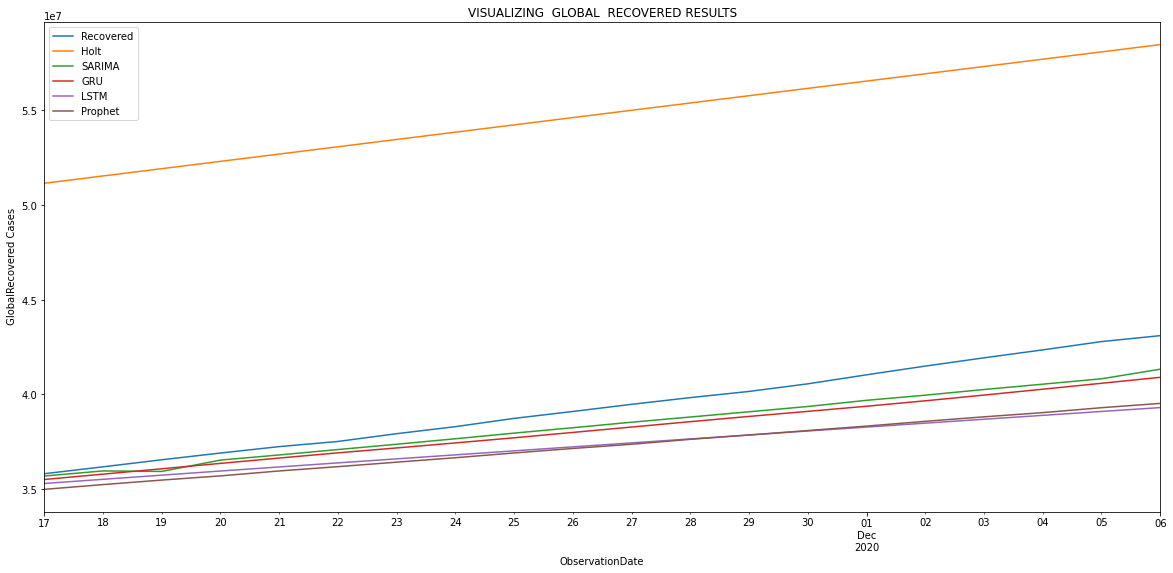

Mean: 39349811.25


,Recovered,SARIMA,Holt,LSTM,GRU,Prophet
ObservationDate,,,,,,
2020-11-17,35812940.0,3.569022e+07,5.115165e+07,3.529783e+07,35506748.0,3.498653e+07
2020-11-18,36176087.0,3.596027e+07,5.153705e+07,3.551694e+07,35789720.0,3.523911e+07
2020-11-19,36549174.0,3.593335e+07,5.192245e+07,3.573592e+07,36073832.0,3.547624e+07
2020-11-20,36904549.0,3.653182e+07,5.230785e+07,3.595500e+07,36358196.0,3.569844e+07
2020-11-21,37243768.0,3.680358e+07,5.269324e+07,3.617032e+07,36639456.0,3.595836e+07
2020-11-22,37516165.0,3.708889e+07,5.307864e+07,3.638430e+07,36914648.0,3.618555e+07
2020-11-23,37926212.0,3.736925e+07,5.346404e+07,3.659703e+07,37173456.0,3.642253e+07
2020-11-24,38297744.0,3.765870e+07,5.384944e+07,3.680868e+07,37438664.0,3.665680e+07
2020-11-25,38734721.0,3.795691e+07,5.423484e+07,3.702010e+07,37709172.0,3.690939e+07


In [162]:
rrmse_errors = [rholt_rmse_error, rlstm_rmse_error,  rgru_mse_error,rprophet_rmse_error,rsarima_rmse_error]
rmse_errors = [rholt_mse_error,  rlstm_mse_error, rgru_mse_error,rprophet_mse_error,rsarima_mse_error]
accuracy_rec = [raccuracy_holt,raccuracy_lstm, raccuracy_gru, raccuracy_prophet, raccuracy_sarima]
rerrors = pd.DataFrame({"Models" : ["Holt","LSTM","GRU","Prophet","SARIMA"],"RMSE Errors" : rrmse_errors, "MSE Errors" : rmse_errors, "Accuracy(MAPE)" : accuracy_rec})
plt.figure(figsize=(20,9))
plt.title("VISUALIZING  GLOBAL  RECOVERED RESULTS")
test_rec_data['Recovered'].plot(legend=True)
plt.ylabel(" GlobalRecovered Cases")
test_rec_data['Holt'].plot(legend = True);
test_rec_data['SARIMA'].plot(legend = True);
test_rec_data['GRU'].plot(legend = True);
test_rec_data['LSTM'].plot(legend = True);
test_rec_data['Prophet'].plot(legend = True);
plt.show()
print(f"Mean: {test_rec_data['Recovered'].mean()}")
test_rec_data

In [163]:
rerrors

,Models,RMSE Errors,MSE Errors,Accuracy(MAPE)
0,Holt,1.546342e+07,2.391174e+14,0.372813
1,LSTM,2.266142e+06,5.135402e+12,0.049468
2,GRU,1.798271e+12,1.798271e+12,0.029091
3,Prophet,2.256991e+06,5.094010e+12,0.050887
4,SARIMA,1.113289e+06,1.239413e+12,0.023744


# Forecasting death cases

In [165]:
#aggregating death column
dataset_dea = dataset.groupby(['ObservationDate']).agg({'Deaths':'sum'})

In [166]:
dataset_dea.shape

(320, 1)

In [167]:
train_dea_data = dataset_dea[:len( dataset_dea)-20]
test_dea_data = dataset_dea[len( dataset_dea)-20:]
print(f'Length of train data: {len(train_dea_data)}\nLength of Test data: {len(test_dea_data)}')

Length of train data: 300
Length of Test data: 20


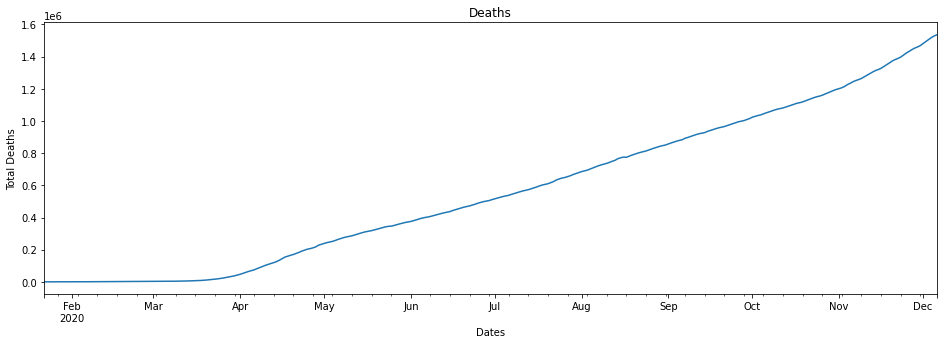

In [168]:
dataset_dea.index.freq = 'D'
axd = dataset_dea['Deaths'].plot(figsize = (16,5), title = "Deaths")
axd.set(xlabel='Dates', ylabel='Total Deaths');

# MODEL 1

,Deaths,SARIMA
ObservationDate,,
2020-11-17,1338609.0,1.335794e+06
2020-11-18,1349936.0,1.345513e+06
2020-11-19,1360917.0,1.354374e+06
2020-11-20,1372755.0,1.363292e+06
2020-11-21,1381539.0,1.371047e+06
2020-11-22,1388599.0,1.379735e+06
2020-11-23,1396913.0,1.387560e+06
2020-11-24,1409691.0,1.396130e+06
2020-11-25,1421748.0,1.404870e+06


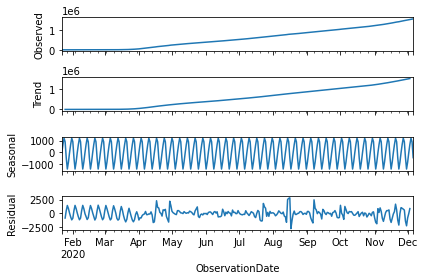

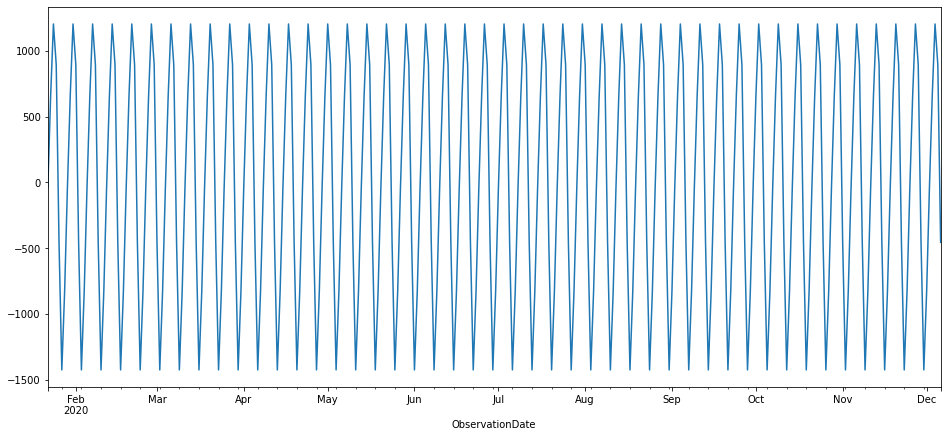

In [169]:
a2 = seasonal_decompose(dataset_dea['Deaths'], model = "add")
a2.plot();
plt.figure(figsize = (16,7))
a2.seasonal.plot();
sarima_model_d = SARIMAX(train_dea_data['Deaths'], order = (2,1,1), seasonal_order = (4,1,3,12))
sarima_result_d = sarima_model_d.fit()
sarima_result_d.summary()
sarima_pred_d = sarima_result_d.predict(start =len(train_dea_data), end = len(dataset_dea)-1, typ="levels").rename("SARIMA")
test_dea_data['SARIMA'] = sarima_pred_d
#test_data.drop(['SARIMA_Predictions'],1,inplace=True)
test_dea_data

MSE Error: 510483457.8522437
RMSE Error: 22593.880982519222
Mean: 565966.690625
Accuracy: 0.013230061098497758 


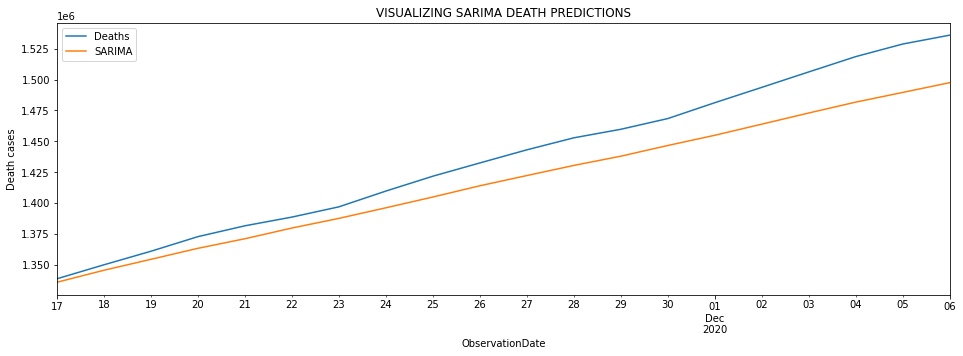

In [170]:
plt.title("VISUALIZING SARIMA DEATH PREDICTIONS")
plt.ylabel("Death cases")
test_dea_data['Deaths'].plot(figsize = (16,5), legend=True)
test_dea_data['SARIMA'].plot(legend = True);
dsarima_mse_error = mean_squared_error(test_dea_data['Deaths'], sarima_pred_d)
dsarima_rmse_error = math.sqrt(dsarima_mse_error)
dmean_value = dataset_dea['Deaths'].mean()
sum=0;
for i in range(1,20) :
    sum=sum+abs((test_dea_data['Deaths'].get(i)-test_dea_data['SARIMA'].get(i))/test_dea_data['Deaths'].get(i))
daccuracy_sarima = sum/20;
#daccuracy = (arima_pred_d/test_dea_data['Deaths'])*100
print(f'MSE Error: {dsarima_mse_error}\nRMSE Error: {dsarima_rmse_error}\nMean: {dmean_value}\nAccuracy: {daccuracy_sarima} ')

# MODEL 2

In [171]:
df_hd = dataset_dea.copy()
df_hd = dataset_dea.reset_index()
df_hd.columns = ['ds','y'] # To use prophet column names should be like that
train_data_hd = df_hd.iloc[:len(dataset_dea)-20]
test_data_hd = df_hd.iloc[len(dataset_dea)-20:]
holt_d=Holt(np.asarray(dataset_dea["Deaths"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred_d = test_data_hd.copy()
y_pred_d["Holt"]=holt_d.forecast(len(test_data_hd))
holt_new_prediction_d=[]
for i in range(1,21):
   holt_new_prediction_d.append(holt_d.forecast((len(test_data_hd)+i))[-1])
test_dea_data["Holt"]=holt_new_prediction_d
test_dea_data


,Deaths,SARIMA,Holt
ObservationDate,,,
2020-11-17,1338609.0,1.335794e+06,1.744657e+06
2020-11-18,1349936.0,1.345513e+06,1.754650e+06
2020-11-19,1360917.0,1.354374e+06,1.764644e+06
2020-11-20,1372755.0,1.363292e+06,1.774637e+06
2020-11-21,1381539.0,1.371047e+06,1.784631e+06
2020-11-22,1388599.0,1.379735e+06,1.794624e+06
2020-11-23,1396913.0,1.387560e+06,1.804617e+06
2020-11-24,1409691.0,1.396130e+06,1.814611e+06
2020-11-25,1421748.0,1.404870e+06,1.824604e+06


MSE Error: 162000614223.9831
RMSE Error: 402492.99897511647
Mean: 565966.690625
Accuracy: 0.26545004643762915


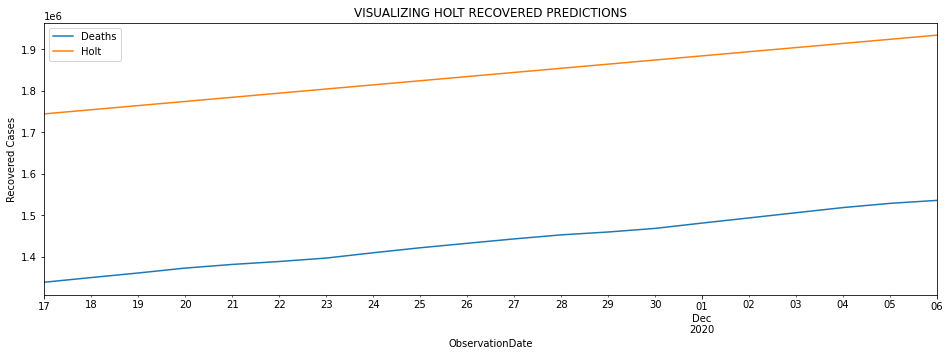

In [173]:
plt.title("VISUALIZING HOLT RECOVERED PREDICTIONS")
plt.ylabel("Recovered Cases")
test_dea_data['Deaths'].plot(figsize = (16,5), legend=True)
test_dea_data['Holt'].plot(legend = True);
dholt_rmse_error = rmse(test_dea_data['Deaths'], holt_new_prediction_d)
dholt_mse_error = dholt_rmse_error**2
dmean_value = dataset_dea['Deaths'].mean()
sum=0;
for i in range(1,20) :
    sum=sum+abs((test_dea_data['Deaths'].get(i)-test_dea_data['Holt'].get(i))/test_dea_data['Deaths'].get(i))
daccuracy_holt = sum/20;
#daccuracy_holt= (test_dea_data['Holt']/test_dea_data['Deaths'])*100
print(f'MSE Error: {dholt_mse_error}\nRMSE Error: {dholt_rmse_error}\nMean: {dmean_value}\nAccuracy: {daccuracy_holt}')


# MODEL 3

In [174]:
scaler = MinMaxScaler()
scaler.fit(train_dea_data)
scaled_train_data_d = scaler.transform(train_dea_data)
scaled_test_data_d = scaler.transform(test_dea_data)
n_input = 20
n_features= 1
generator = TimeseriesGenerator(scaled_train_data_d, scaled_train_data_d, length=n_input, batch_size=1)
lstm_model_d = Sequential()
lstm_model_d.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model_d.add(Dense(1))
lstm_model_d.compile(optimizer='adam', loss='mse')

lstm_model_d.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [175]:
lstm_model_d.fit_generator(generator,epochs=10)

Epoch 1/10
280/280 [==============================] - 7s 20ms/step - loss: 0.0347
Epoch 2/10
280/280 [==============================] - 6s 20ms/step - loss: 8.5380e-05
Epoch 3/10
280/280 [==============================] - 5s 20ms/step - loss: 0.0015
Epoch 4/10
280/280 [==============================] - 6s 20ms/step - loss: 3.4438e-05
Epoch 5/10
280/280 [==============================] - 6s 20ms/step - loss: 2.9355e-05
Epoch 6/10
280/280 [==============================] - 6s 20ms/step - loss: 7.2296e-05
Epoch 7/10
280/280 [==============================] - 6s 20ms/step - loss: 9.6903e-04
Epoch 8/10
280/280 [==============================] - 6s 20ms/step - loss: 4.0156e-05
Epoch 9/10
280/280 [==============================] - 6s 20ms/step - loss: 6.5790e-05
Epoch 10/10
280/280 [==============================] - 6s 20ms/step - loss: 8.0953e-05


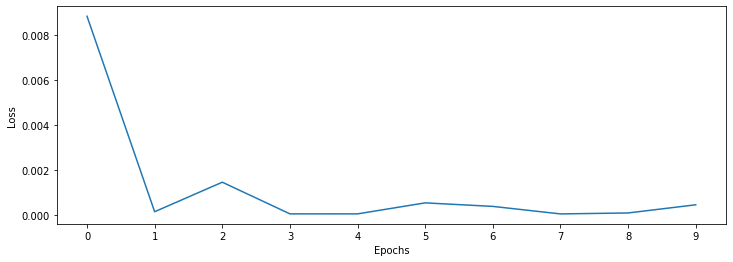

In [177]:
losses_lstm_d = lstm_model_d.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm_d)),losses_lstm_d);

In [178]:
lstm_predictions_scaled_d = list()
batch = scaled_train_data_d[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))
for i in range(len(test_dea_data)):   
    lstm_pred_d= lstm_model_d.predict(current_batch)[0]
    lstm_predictions_scaled_d.append(lstm_pred_d) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred_d]],axis=1)
lstm_predictions_d = scaler.inverse_transform(lstm_predictions_scaled_d)
test_dea_data['LSTM']= lstm_predictions_d

In [179]:
test_dea_data

,Deaths,SARIMA,Holt,LSTM
ObservationDate,,,,
2020-11-17,1338609.0,1.335794e+06,1.744657e+06,1.337482e+06
2020-11-18,1349936.0,1.345513e+06,1.754650e+06,1.346839e+06
2020-11-19,1360917.0,1.354374e+06,1.764644e+06,1.356327e+06
2020-11-20,1372755.0,1.363292e+06,1.774637e+06,1.365950e+06
2020-11-21,1381539.0,1.371047e+06,1.784631e+06,1.375726e+06
2020-11-22,1388599.0,1.379735e+06,1.794624e+06,1.385679e+06
2020-11-23,1396913.0,1.387560e+06,1.804617e+06,1.395821e+06
2020-11-24,1409691.0,1.396130e+06,1.814611e+06,1.406142e+06
2020-11-25,1421748.0,1.404870e+06,1.824604e+06,1.416609e+06


MSE Error: 17139999.92765335
RMSE Error: 4140.048300159474
Mean: 565966.690625
Accuracy: 0.0024173115387608438


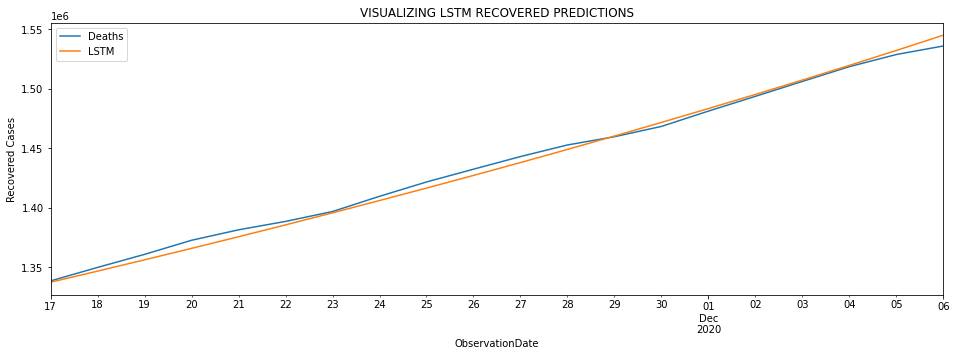

In [181]:
plt.title("VISUALIZING LSTM RECOVERED PREDICTIONS")
plt.ylabel("Recovered Cases")
test_dea_data['Deaths'].plot(figsize = (16,5), legend=True)
test_dea_data['LSTM'].plot(legend = True);
dlstm_rmse_error = rmse(test_dea_data['Deaths'], test_dea_data["LSTM"])
dlstm_mse_error = dlstm_rmse_error**2
dmean_value = dataset_dea['Deaths'].mean()
sum=0;
for i in range(1,20) :
    sum=sum+abs((test_dea_data['Deaths'].get(i)-test_dea_data['LSTM'].get(i))/test_dea_data['Deaths'].get(i))
daccuracy_lstm= sum/20;
#daccuracy_lstm = ((test_dea_data['Deaths'])/test_dea_data['LSTM'])*100
print(f'MSE Error: {dlstm_mse_error}\nRMSE Error: {dlstm_rmse_error}\nMean: {dmean_value}\nAccuracy: {daccuracy_lstm}')

# MODEL 4

In [193]:
from keras.optimizers import SGD
dregressorGRU = Sequential()
# First GRU layer with Dropout regularisation
dregressorGRU.add(GRU(units=200, return_sequences=True, input_shape=(n_input,1), activation='relu'))
dregressorGRU.add(GRU(units=200, activation='relu'))
# The output layer
dregressorGRU.add(Dense(units=1))
# Compiling the RNN
dregressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
rregressorGRU.fit_generator(generator,epochs=20)
inputs_d = dataset_dea[len(dataset_dea) - len(test_dea_data) - 80:].values
inputs_d = inputs_d.reshape(-1,1)
inputs_d = scaler.transform(inputs_d)

X_test_d = []
for i in range(80, 100):
    X_test_d.append(inputs_d[i-80:i,0])
X_test_d = np.array(X_test_d)
X_test_d = np.reshape(X_test_d, (X_test_d.shape[0],X_test_d.shape[1],1))
GRU_predicted_d = dregressorGRU.predict(X_test_d)
GRU_predicted_d = scaler.inverse_transform(GRU_predicted_d)

test_dea_data['GRU']=GRU_predicted_d
test_dea_data

Epoch 1/20
280/280 [==============================] - 11s 40ms/step - loss: 1.2461e-05
Epoch 2/20
280/280 [==============================] - 11s 39ms/step - loss: 1.2160e-05
Epoch 3/20
280/280 [==============================] - 11s 39ms/step - loss: 1.1543e-05
Epoch 4/20
280/280 [==============================] - 11s 38ms/step - loss: 1.1135e-05
Epoch 5/20
280/280 [==============================] - 11s 38ms/step - loss: 1.1839e-05
Epoch 6/20
280/280 [==============================] - 11s 38ms/step - loss: 1.3974e-05
Epoch 7/20
280/280 [==============================] - 11s 38ms/step - loss: 1.0848e-05
Epoch 8/20
280/280 [==============================] - 11s 38ms/step - loss: 1.2074e-05
Epoch 9/20
280/280 [==============================] - 11s 38ms/step - loss: 1.0369e-05
Epoch 10/20
280/280 [==============================] - 10s 37ms/step - loss: 1.1237e-05
Epoch 11/20
280/280 [==============================] - 10s 37ms/step - loss: 1.1639e-05
Epoch 12/20
280/280 [====================

,Deaths,SARIMA,Holt,LSTM,GRU
ObservationDate,,,,,
2020-11-17,1338609.0,1.335794e+06,1.744657e+06,1.337482e+06,13686.672852
2020-11-18,1349936.0,1.345513e+06,1.754650e+06,1.346839e+06,13780.124023
2020-11-19,1360917.0,1.354374e+06,1.764644e+06,1.356327e+06,13882.616211
2020-11-20,1372755.0,1.363292e+06,1.774637e+06,1.365950e+06,13990.291016
2020-11-21,1381539.0,1.371047e+06,1.784631e+06,1.375726e+06,14103.517578
2020-11-22,1388599.0,1.379735e+06,1.794624e+06,1.385679e+06,14211.385742
2020-11-23,1396913.0,1.387560e+06,1.804617e+06,1.395821e+06,14308.259766
2020-11-24,1409691.0,1.396130e+06,1.814611e+06,1.406142e+06,14400.364258
2020-11-25,1421748.0,1.404870e+06,1.824604e+06,1.416609e+06,14504.052734


MSE Error: 2026832512525.3108
RMSE Error: 1423668.680741875
Mean: 565966.690625
Accuracy: 0.9402942782395616


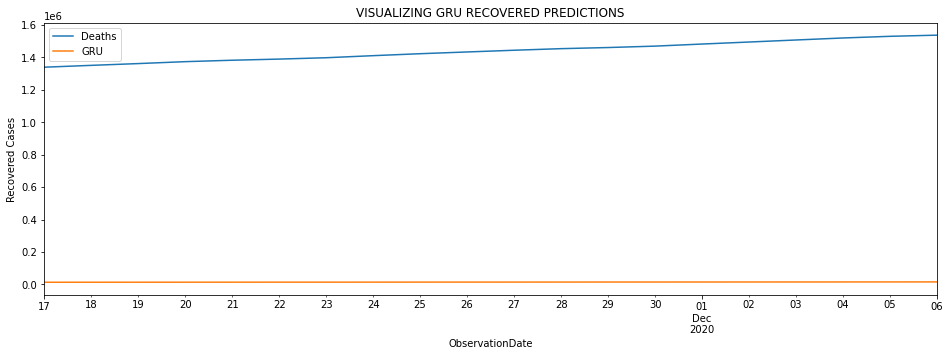

In [196]:
plt.title("VISUALIZING GRU RECOVERED PREDICTIONS")
plt.ylabel("Recovered Cases")
test_dea_data['Deaths'].plot(figsize = (16,5), legend=True)
test_dea_data['GRU'].plot(legend = True)
dgru_rmse_error = rmse(test_dea_data['Deaths'], test_dea_data["GRU"])
dgru_mse_error = dgru_rmse_error**2
dmean_value = dataset_dea['Deaths'].mean()
sum=0;
for i in range(1,20) :
    sum=sum+abs((test_dea_data['Deaths'].get(i)-test_dea_data['GRU'].get(i))/test_dea_data['Deaths'].get(i))
daccuracy_gru= sum/20;

#daccuracy_gru = ((test_dea_data['GRU'])/test_dea_data['Deaths'])*100
print(f'MSE Error: {dgru_mse_error}\nRMSE Error: {dgru_rmse_error}\nMean: {dmean_value}\nAccuracy: {daccuracy_gru}')

# MODEL 5

In [197]:
df_prd = dataset_dea.copy()
df_prd = dataset_dea.reset_index()
df_prd.columns = ['ds','y'] # To use prophet column names should be like that
train_data_prd = df_prd.iloc[:len(dataset_dea)-20]
test_data_prd = df_prd.iloc[len(dataset_dea)-20:]
from fbprophet import Prophet
md = Prophet()
md.fit(train_data_prd)
future_d = md.make_future_dataframe(periods=20,freq='D')
prophet_pred_d = md.predict(future)
prophet_pred_d.tail()
prophet_pred_d = pd.DataFrame({"Date" : prophet_pred_d[-20:]['ds'], "Pred" : prophet_pred_d[-20:]["yhat"]})
prophet_pred_d = prophet_pred_d.set_index("Date")
prophet_pred_d.index.freq = "D"
test_dea_data["Prophet"] = prophet_pred_d['Pred'].values
test_dea_data

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,Deaths,SARIMA,Holt,LSTM,GRU,Prophet
ObservationDate,,,,,,
2020-11-17,1338609.0,1.335794e+06,1.744657e+06,1.337482e+06,13686.672852,1.306063e+06
2020-11-18,1349936.0,1.345513e+06,1.754650e+06,1.346839e+06,13780.124023,1.312956e+06
2020-11-19,1360917.0,1.354374e+06,1.764644e+06,1.356327e+06,13882.616211,1.319792e+06
2020-11-20,1372755.0,1.363292e+06,1.774637e+06,1.365950e+06,13990.291016,1.326452e+06
2020-11-21,1381539.0,1.371047e+06,1.784631e+06,1.375726e+06,14103.517578,1.332367e+06
2020-11-22,1388599.0,1.379735e+06,1.794624e+06,1.385679e+06,14211.385742,1.337308e+06
2020-11-23,1396913.0,1.387560e+06,1.804617e+06,1.395821e+06,14308.259766,1.342522e+06
2020-11-24,1409691.0,1.396130e+06,1.814611e+06,1.406142e+06,14400.364258,1.348500e+06
2020-11-25,1421748.0,1.404870e+06,1.824604e+06,1.416609e+06,14504.052734,1.355394e+06


MSE Error: 5848265566.785314
RMSE Error: 76473.95351873286
Mean: 565966.690625
Accuracy: 0.04846280495239501


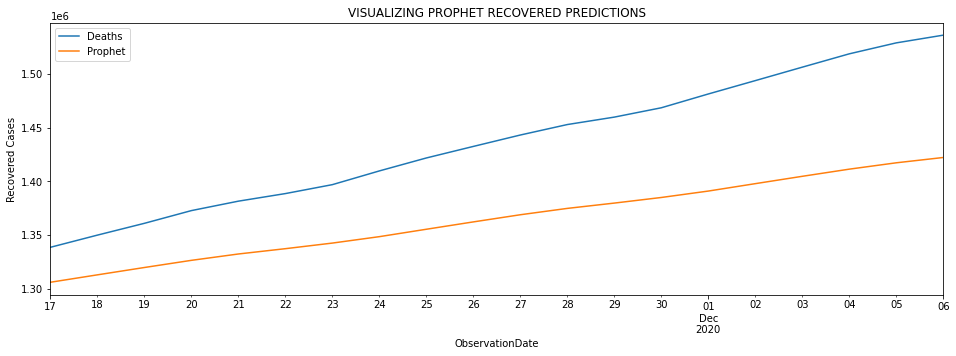

In [199]:
plt.title("VISUALIZING PROPHET RECOVERED PREDICTIONS")
plt.ylabel("Recovered Cases")
test_dea_data['Deaths'].plot(figsize = (16,5), legend=True)
test_dea_data['Prophet'].plot(legend = True);
dprophet_rmse_error = rmse(test_dea_data['Deaths'], test_dea_data["Prophet"])
dprophet_mse_error = dprophet_rmse_error**2
dmean_value = dataset_dea['Deaths'].mean()
sum=0;
for i in range(1,20) :
    sum=sum+abs((test_dea_data['Deaths'].get(i)-test_dea_data['Prophet'].get(i))/test_dea_data['Deaths'].get(i))
daccuracy_prophet= sum/20;
#daccuracy_prophet=(test_dea_data['Prophet']/test_dea_data['Deaths'])*100
print(f'MSE Error: {dprophet_mse_error}\nRMSE Error: {dprophet_rmse_error}\nMean: {dmean_value}\nAccuracy: {daccuracy_prophet}')

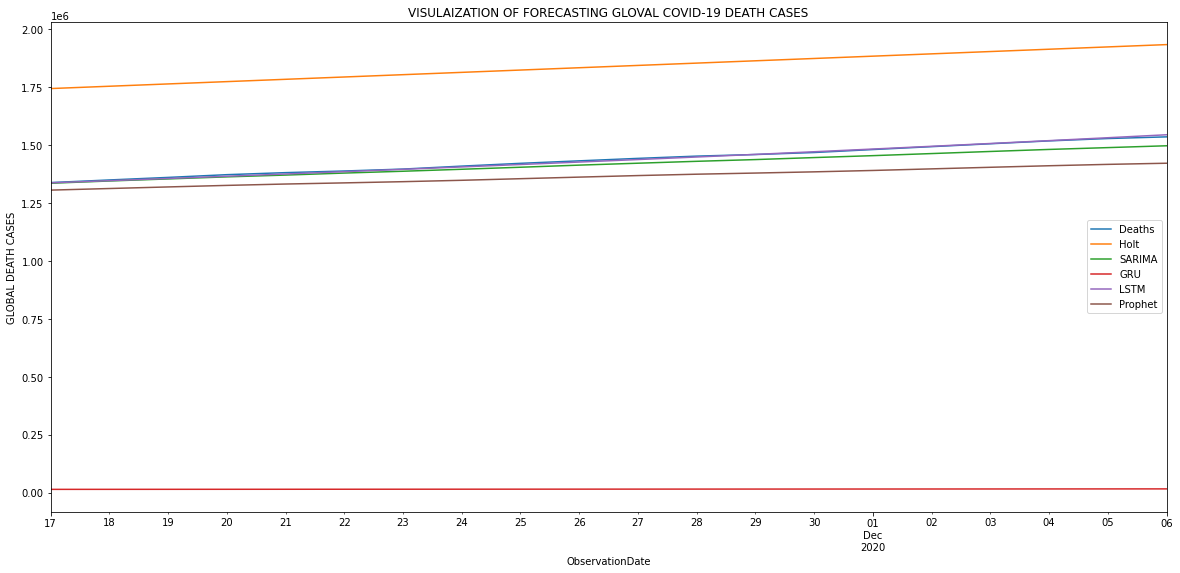

In [202]:
drmse_errors = [dholt_rmse_error, dlstm_rmse_error,  dgru_rmse_error,dprophet_rmse_error,dsarima_rmse_error]
dmse_errors = [dholt_mse_error,  dlstm_mse_error,  dgru_mse_error,dprophet_mse_error,dsarima_mse_error]
accuracy_dea = [daccuracy_holt,daccuracy_lstm, daccuracy_gru, daccuracy_holt, daccuracy_sarima]
derrors = pd.DataFrame({"Models" : ["Holt","LSTM","GRU","Prophet","ARIMA"],"RMSE Errors" : drmse_errors, "MSE Errors" : dmse_errors, "Accuracy" : accuracy_dea})
plt.figure(figsize=(20,9))
plt.title("VISULAIZATION OF FORECASTING GLOVAL COVID-19 DEATH CASES")
plt.ylabel("GLOBAL DEATH CASES")
test_dea_data['Deaths'].plot(legend=True)
test_dea_data['Holt'].plot(legend = True);
test_dea_data['SARIMA'].plot(legend = True);
test_dea_data['GRU'].plot(legend = True);
test_dea_data['LSTM'].plot(legend = True);
test_dea_data['Prophet'].plot(legend = True);
plt.show()

In [203]:
print(f"Mean: {test_dea_data['Deaths'].mean()}")
derrors

Mean: 1437114.45


,Models,RMSE Errors,MSE Errors,Accuracy
0,Holt,4.024930e+05,1.620006e+11,0.265450
1,LSTM,4.140048e+03,1.714000e+07,0.002417
2,GRU,1.423669e+06,2.026833e+12,0.940294
3,Prophet,7.647395e+04,5.848266e+09,0.265450
4,ARIMA,2.259388e+04,5.104835e+08,0.013230


In [204]:
test_dea_data

,Deaths,SARIMA,Holt,LSTM,GRU,Prophet
ObservationDate,,,,,,
2020-11-17,1338609.0,1.335794e+06,1.744657e+06,1.337482e+06,13686.672852,1.306063e+06
2020-11-18,1349936.0,1.345513e+06,1.754650e+06,1.346839e+06,13780.124023,1.312956e+06
2020-11-19,1360917.0,1.354374e+06,1.764644e+06,1.356327e+06,13882.616211,1.319792e+06
2020-11-20,1372755.0,1.363292e+06,1.774637e+06,1.365950e+06,13990.291016,1.326452e+06
2020-11-21,1381539.0,1.371047e+06,1.784631e+06,1.375726e+06,14103.517578,1.332367e+06
2020-11-22,1388599.0,1.379735e+06,1.794624e+06,1.385679e+06,14211.385742,1.337308e+06
2020-11-23,1396913.0,1.387560e+06,1.804617e+06,1.395821e+06,14308.259766,1.342522e+06
2020-11-24,1409691.0,1.396130e+06,1.814611e+06,1.406142e+06,14400.364258,1.348500e+06
2020-11-25,1421748.0,1.404870e+06,1.824604e+06,1.416609e+06,14504.052734,1.355394e+06
